In [1]:
import os
import nltk
import pandas as pd
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thakrav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/thakrav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/thakrav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/thakrav/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
from paragraph_cleaner import ParagraphCleaner
from paragraph_analysis import ParagraphAnalysis
from utils import big_data_dict, styled_print, create_dir, extract_images, extract_paragraphs, \
    random_select_dict


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
book_file_path = "../data/raw-data/fire-and-blood.docx"

## Extract Raw Data From the Docx File

Using Microsoft Word's Word Counter Tool, we found the following information:

| Property      | Count |
| ----------- | ----------- |
| Pages       | 703         |
| Words       | 256,032     |
| Paragraphs  | 3197        |
| Lines       | 23,849      |
| Graphics    | 71          |
| Characters (No Space) | 1,189,352 |
| Characters (With Space) | 1,441,453 |

We have used Microsoft Word's Advance Search Feature (Use flag `^g`) to find total number of graphical objects in our document.

The goal of this part of code is to extract similar amount of data from our document. 

**Note** Our numbers might not exactly match these statics but we will try to capture numbers as close to these stats. 

### Extract Images

In [5]:
image_dir = create_dir("../data/processed-data", "book-images")
image_file_paths = extract_images(book_file_path, image_dir, verbose=0)
styled_print(f"Found Total {len(image_file_paths)} Images from the Book {book_file_path}", header=True)

› creating directory ... ../data/processed-data/book-images
› Extracting Images from ../data/raw-data/fire-and-blood.docx
› Found Total 112 Images from the Book ../data/raw-data/fire-and-blood.docx


In [6]:
for i, file_path in enumerate(image_file_paths):
    big_data_dict["book-images"].append(
        {
            "id": i,
            "file": file_path
        }
    )

**Observations**
- As indicated here, we were able to find total 112 images from the book. 
- We have manually checked all the images to verify that there is no `Non-Image` object present. 
- We have found that our approach to extract images actually `extracted all the correct images` and it is much better that using Microsoft Word's Advance Search option to find images. 

### Extract Paragraphs

In [7]:
book_text_dir = create_dir("../data/processed-data", "clean-csvs")
row_paragraphs = extract_paragraphs(book_file_path, min_char_count=1)
styled_print(f"Found Total {len(row_paragraphs)} Paragraphs from the Book {book_file_path}", header=True)

› creating directory ... ../data/processed-data/clean-csvs
› Extracting Paragraphs from ../data/raw-data/fire-and-blood.docx
› Found Total 3168 Paragraphs from the Book ../data/raw-data/fire-and-blood.docx


In [8]:
# Clean Initial Pages and Indexes
for i in range(100):
    row_paragraphs.pop(i, None)

In [9]:
book_df = pd.DataFrame(row_paragraphs.items(), columns=["id", "paragraphs"])
book_df.to_csv(os.path.join(book_text_dir, "book-raw-paragraphs.csv"), index=False, header=True)

In [10]:
styled_print(f"Some Sample Paragraphs from the Book {book_file_path}", header=True)
sampled_paragraphs = random_select_dict(row_paragraphs, 5)
for key, val in sampled_paragraphs.items():
    styled_print(f"{key} - {val}")

› Some Sample Paragraphs from the Book ../data/raw-data/fire-and-blood.docx
    › 1087 - “Then who shall sit the Iron Throne?” demanded Lord Celtigar. “Princess Aerea,” Lord Rogar answered at once. “There is a fire in
    › 2635 - When the Brackens gathered a strong force to strike back, Lord Samwell Blackwood surprised them on the march, taking them unawares as they camped beneath a riverside mill. In the fight that followed, the mill was put to the torch, and men fought and died for hours bathed in the red light of the flames. Ser Amos Bracken, leading the host from Stone Hedge, cut down and slew Lord Blackwood in single combat, only to perish himself when a weirwood arrow found the eye slit of his helm and drove deep into his skull. Supposedly that shaft was loosed by Lord Samwell’s sixteen-year-old sister, Alysanne, who would later be known as Black Aly, but whether this is fact or
    › 2823 - Roddy the Ruin and his Winter Wolves had joined with Forrest Frey, Lord of the Crossing,

### Clean Paragraphs

In [11]:
paragraph_cleaner = ParagraphCleaner(row_paragraphs)

In [12]:
cleaned_paragraphs = paragraph_cleaner.clean_paragraphs()
styled_print(f"Found Total {len(cleaned_paragraphs)} Paragraphs from the Book {book_file_path}", header=True)

› Found Total 3129 Paragraphs from the Book ../data/raw-data/fire-and-blood.docx


In [13]:
book_df = pd.DataFrame(cleaned_paragraphs.items(), columns=["id", "paragraphs"])
book_df.to_csv(os.path.join(book_text_dir, "book-clean-paragraphs.csv"), index=False, header=True)

In [14]:
styled_print(f"Some Sample Cleaned Paragraphs from the Book {book_file_path}", header=True)
sampled_paragraphs = random_select_dict(cleaned_paragraphs, 5)
for key, val in sampled_paragraphs.items():
    styled_print(f"{key} - {val}")

› Some Sample Cleaned Paragraphs from the Book ../data/raw-data/fire-and-blood.docx
    › 4211 - wealth consequence restore fortune lord alyn assembled large fleet merchantman dozen war galley guard intending sail old volantis way pentos tyrosh lys visiting dorne way home
    › 3849 - mushroom wise fool observes certain door best opened “ never know might come ” peake opened queen ’ door daughter lord daughter well sister niece cousin even odd widowed mother maiden aunt door could close came pushing insisting blood would make better royal consort lady turnip
    › 1916 - prince vaegon ’ fifteenth nameday 78 ac year short manhood jaehaerys alysanne broached obvious solution grand maester “ think mayhaps vaegon might making maester ”
    › 1039 - none great concern queen familiar long marq farman ruled faircastle lordship amiable good natured man loved child wayward daughter weakling son included loved rhaena targaryen loving well le fortnight queen androw farman celebrated first anniver

### Analysis of Raw Paragraphs

In [15]:
out_dir = create_dir("../data", "analysis-data")
paragraph_analysis = ParagraphAnalysis(
    row_paragraphs, 
    out_dir=out_dir
)
styled_print(f"Found {paragraph_analysis.words_counts} Words.", header=True)

› creating directory ... ../data/analysis-data
› Found 299336 Words.


#### Histogram of Paragraph Lengths

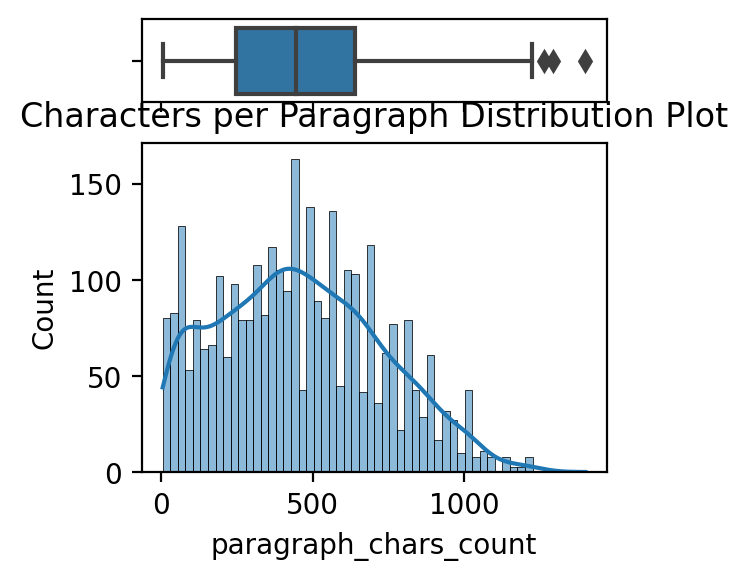

In [16]:
paragraph_analysis.characters_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Histogram of Words per Paragraph

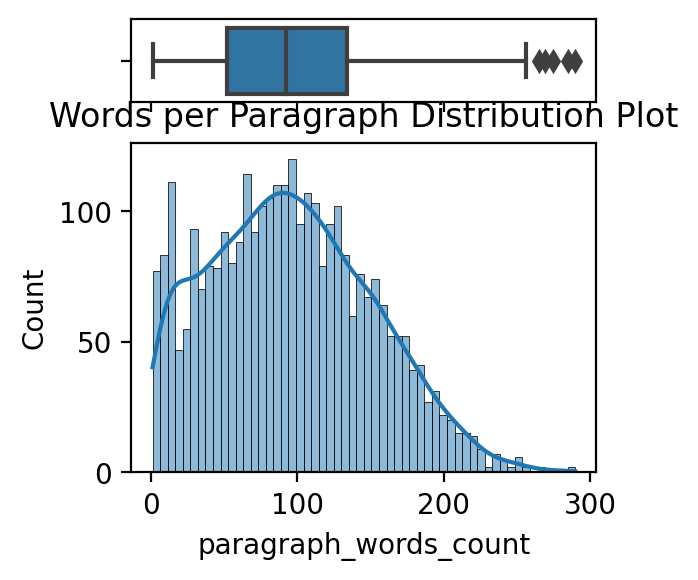

In [17]:
paragraph_analysis.words_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Histogram of Avg Word Length per Paragraph

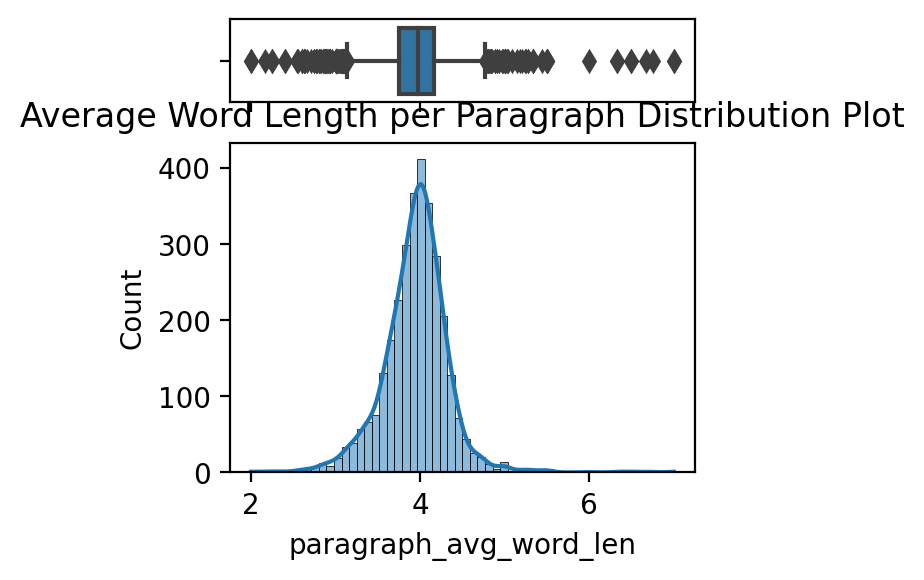

In [18]:
paragraph_analysis.avg_word_len_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Checking Stop Words

In [19]:
stop_words_corpus = paragraph_analysis.get_stop_words_corpus(language='english')
styled_print(f"Found {len(stop_words_corpus.keys())} unique stop words", header=True)

› Found 138 unique stop words


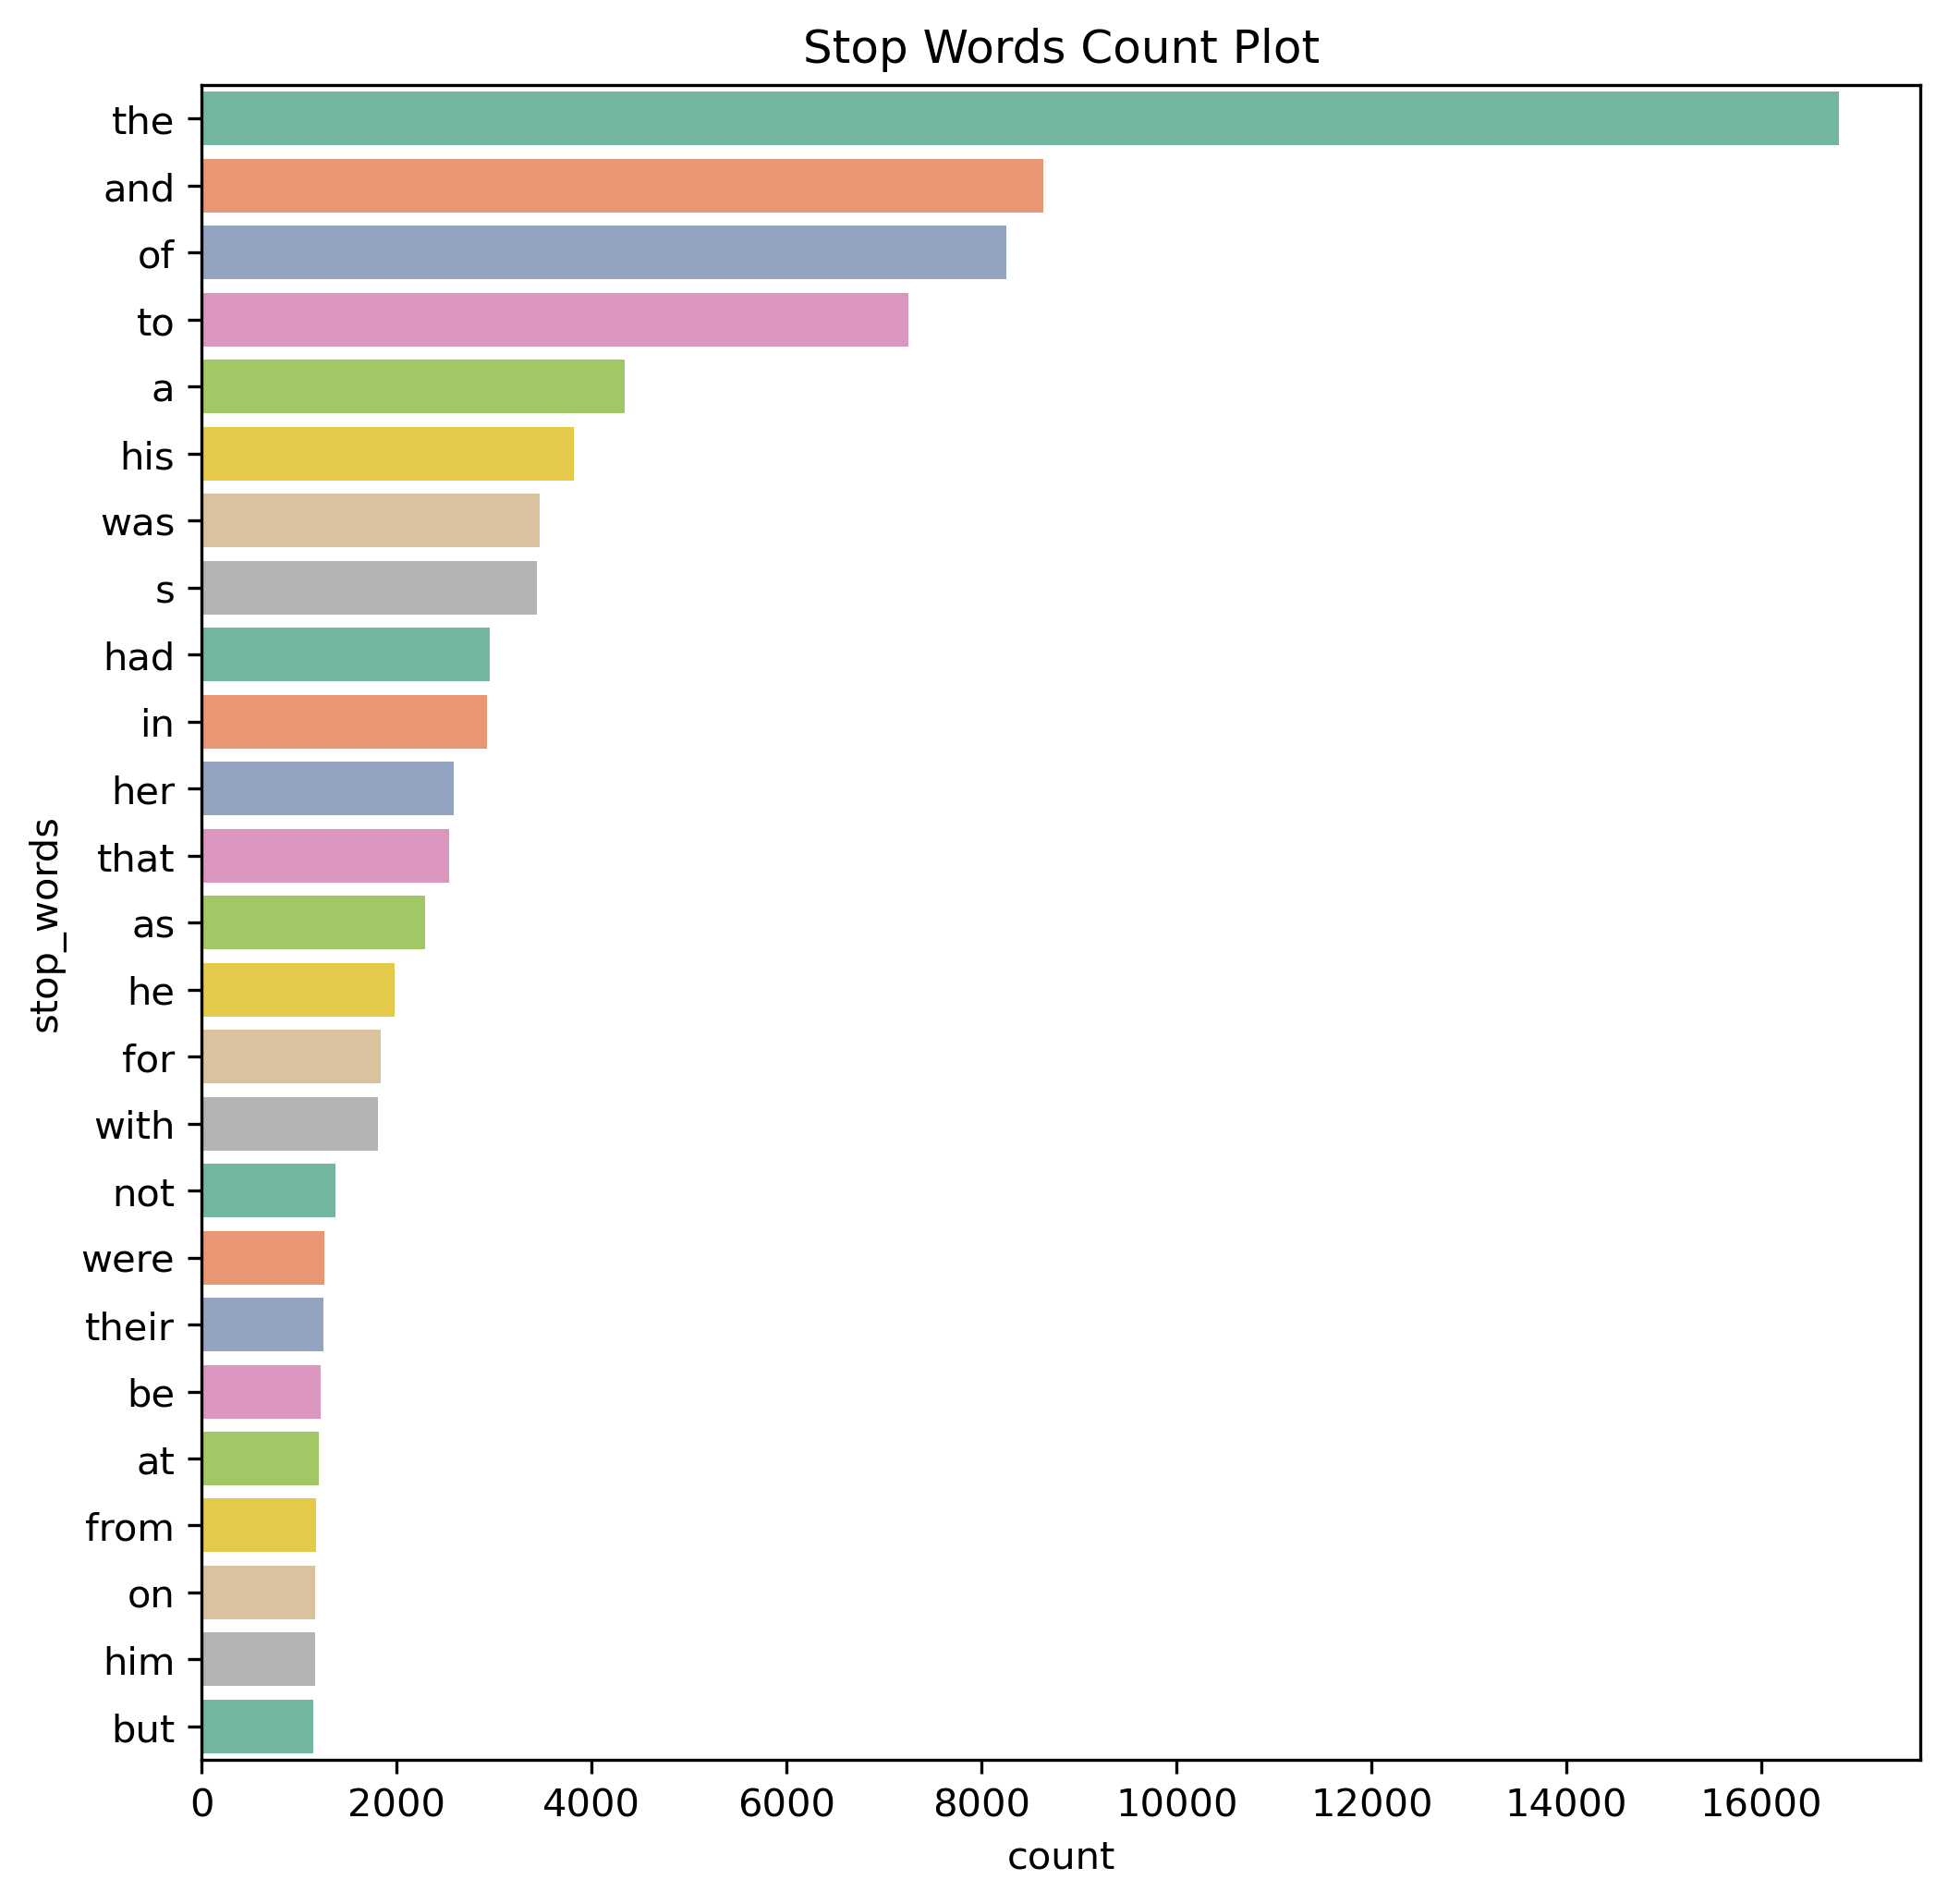

In [20]:
top_k = 25
top_k_stop_words = paragraph_analysis.get_top_k_stop_words(stop_words_corpus, top_k=top_k)
paragraph_analysis.plot_top_k_stop_words(
    top_k_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

#### Checking Non-Stop Words

In [21]:
non_stop_words_corpus = paragraph_analysis.get_non_stop_words_corpus(language='english')
styled_print(f"Found {len(non_stop_words_corpus.keys())} unique non-stop words", header=True)

› Found 14170 unique non-stop words


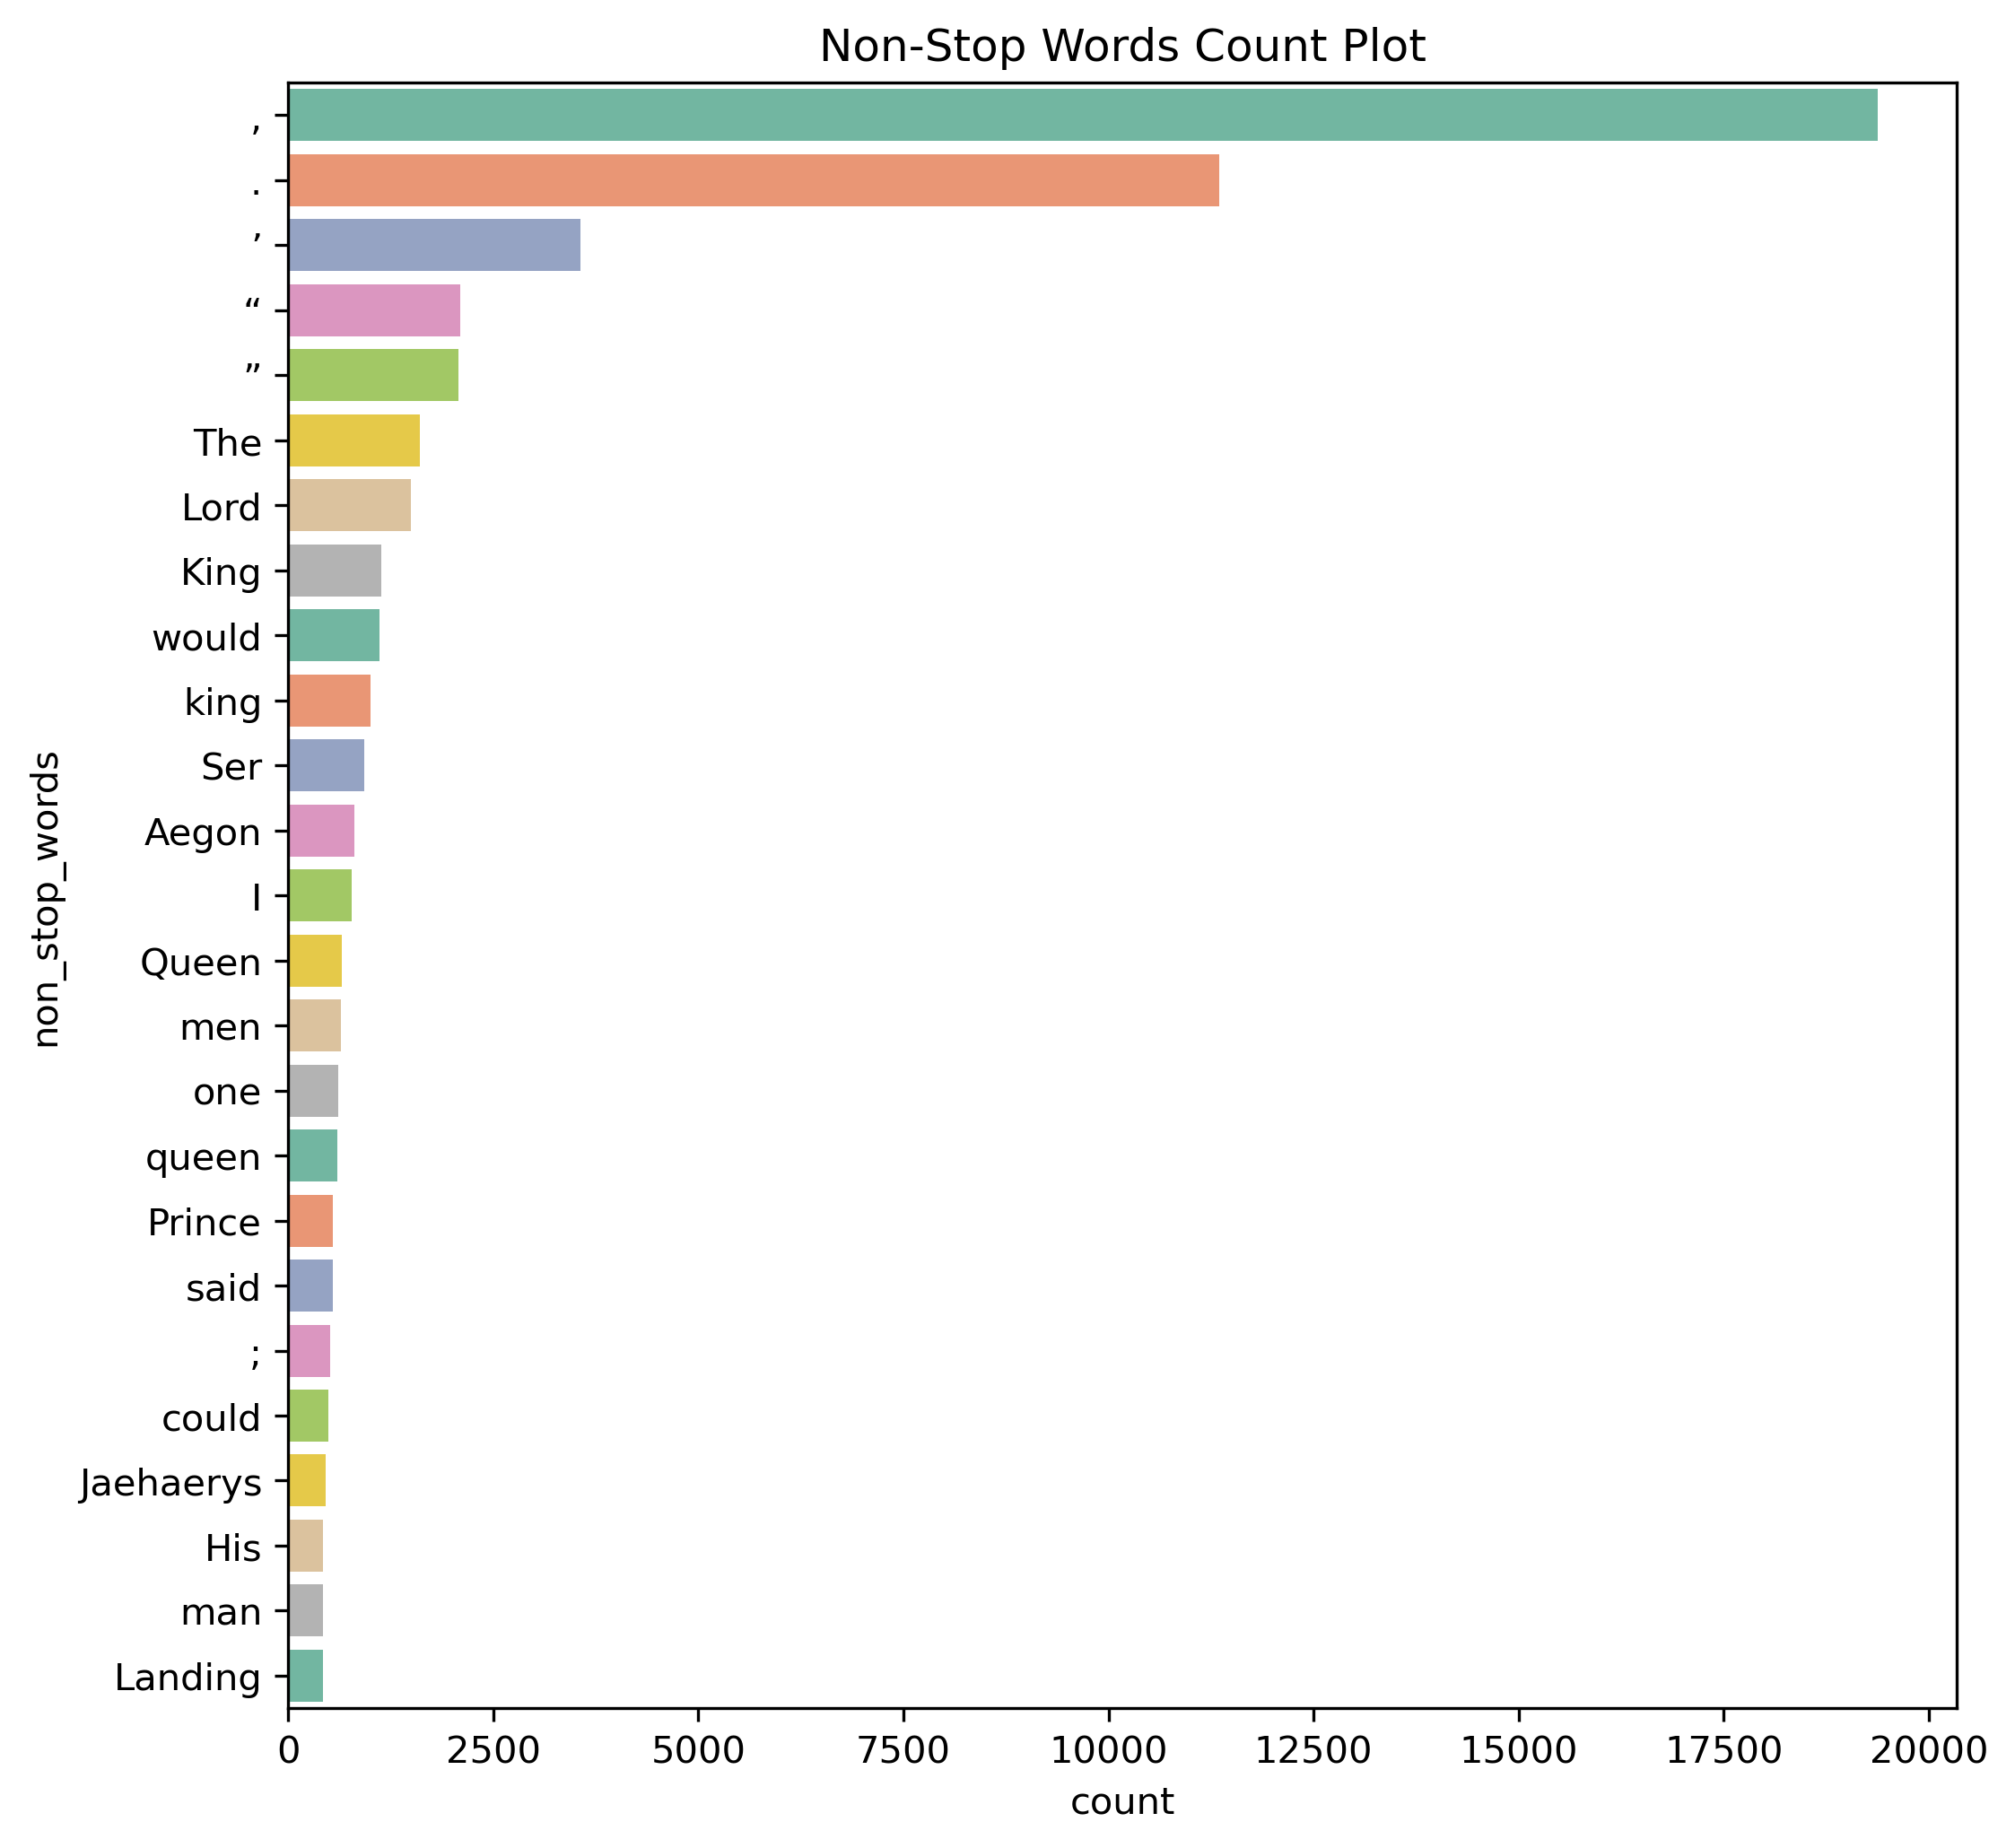

In [22]:
top_k = 25
top_k_non_stop_words = paragraph_analysis.get_top_k_non_stop_words(non_stop_words_corpus, top_k=top_k)
paragraph_analysis.plot_top_k_non_stop_words(
    top_k_non_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

#### Bi-Gram Analysis

In [23]:
bigrams = paragraph_analysis.get_ngrams(n=2, return_list=True)
styled_print(f"Found {len(bigrams)} Bigrams", header=True)

› Found 299335 Bigrams


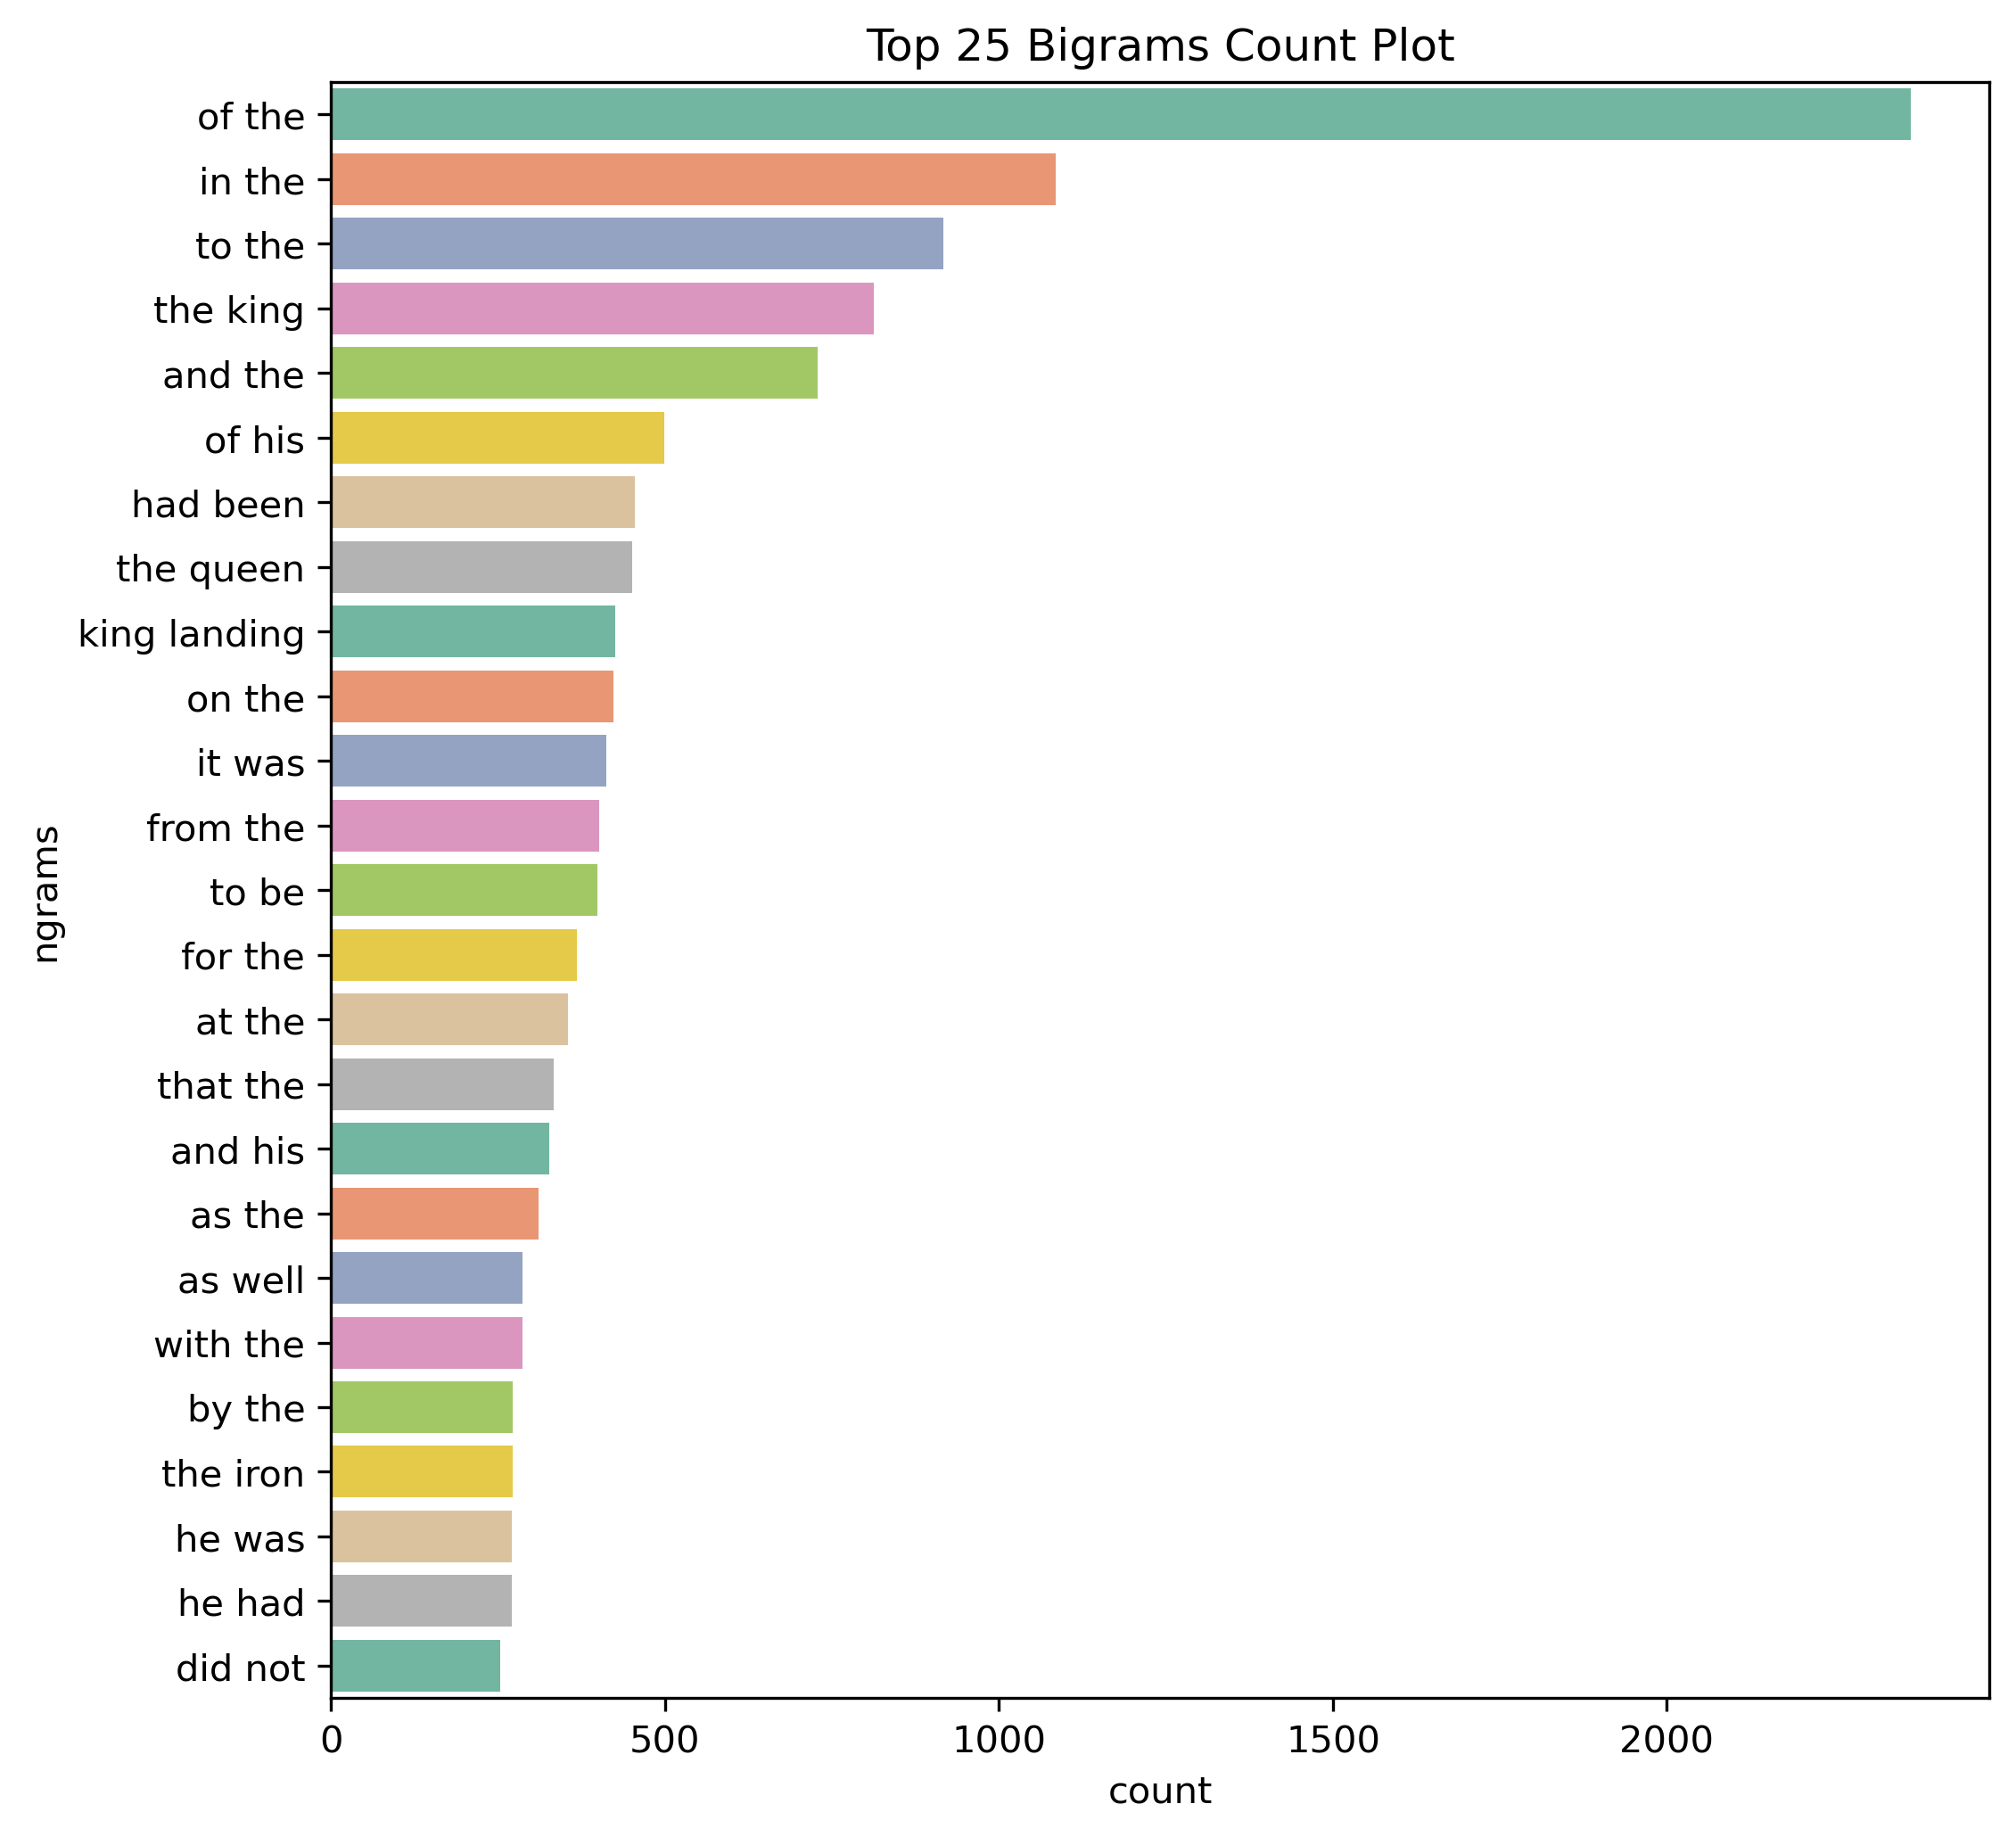

In [24]:
top_k = 25
top_k_bigrams = paragraph_analysis.get_top_k_ngrams(n=2, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_bigrams, title=f"Top {top_k} Bigrams Count Plot", figsize=(8, 8), dpi=300, save_flag=False)

#### Trigram Analysis

In [25]:
trigrams = paragraph_analysis.get_ngrams(n=3, return_list=True)
styled_print(f"Found {len(trigrams)} Trigrams", header=True)

› Found 299334 Trigrams


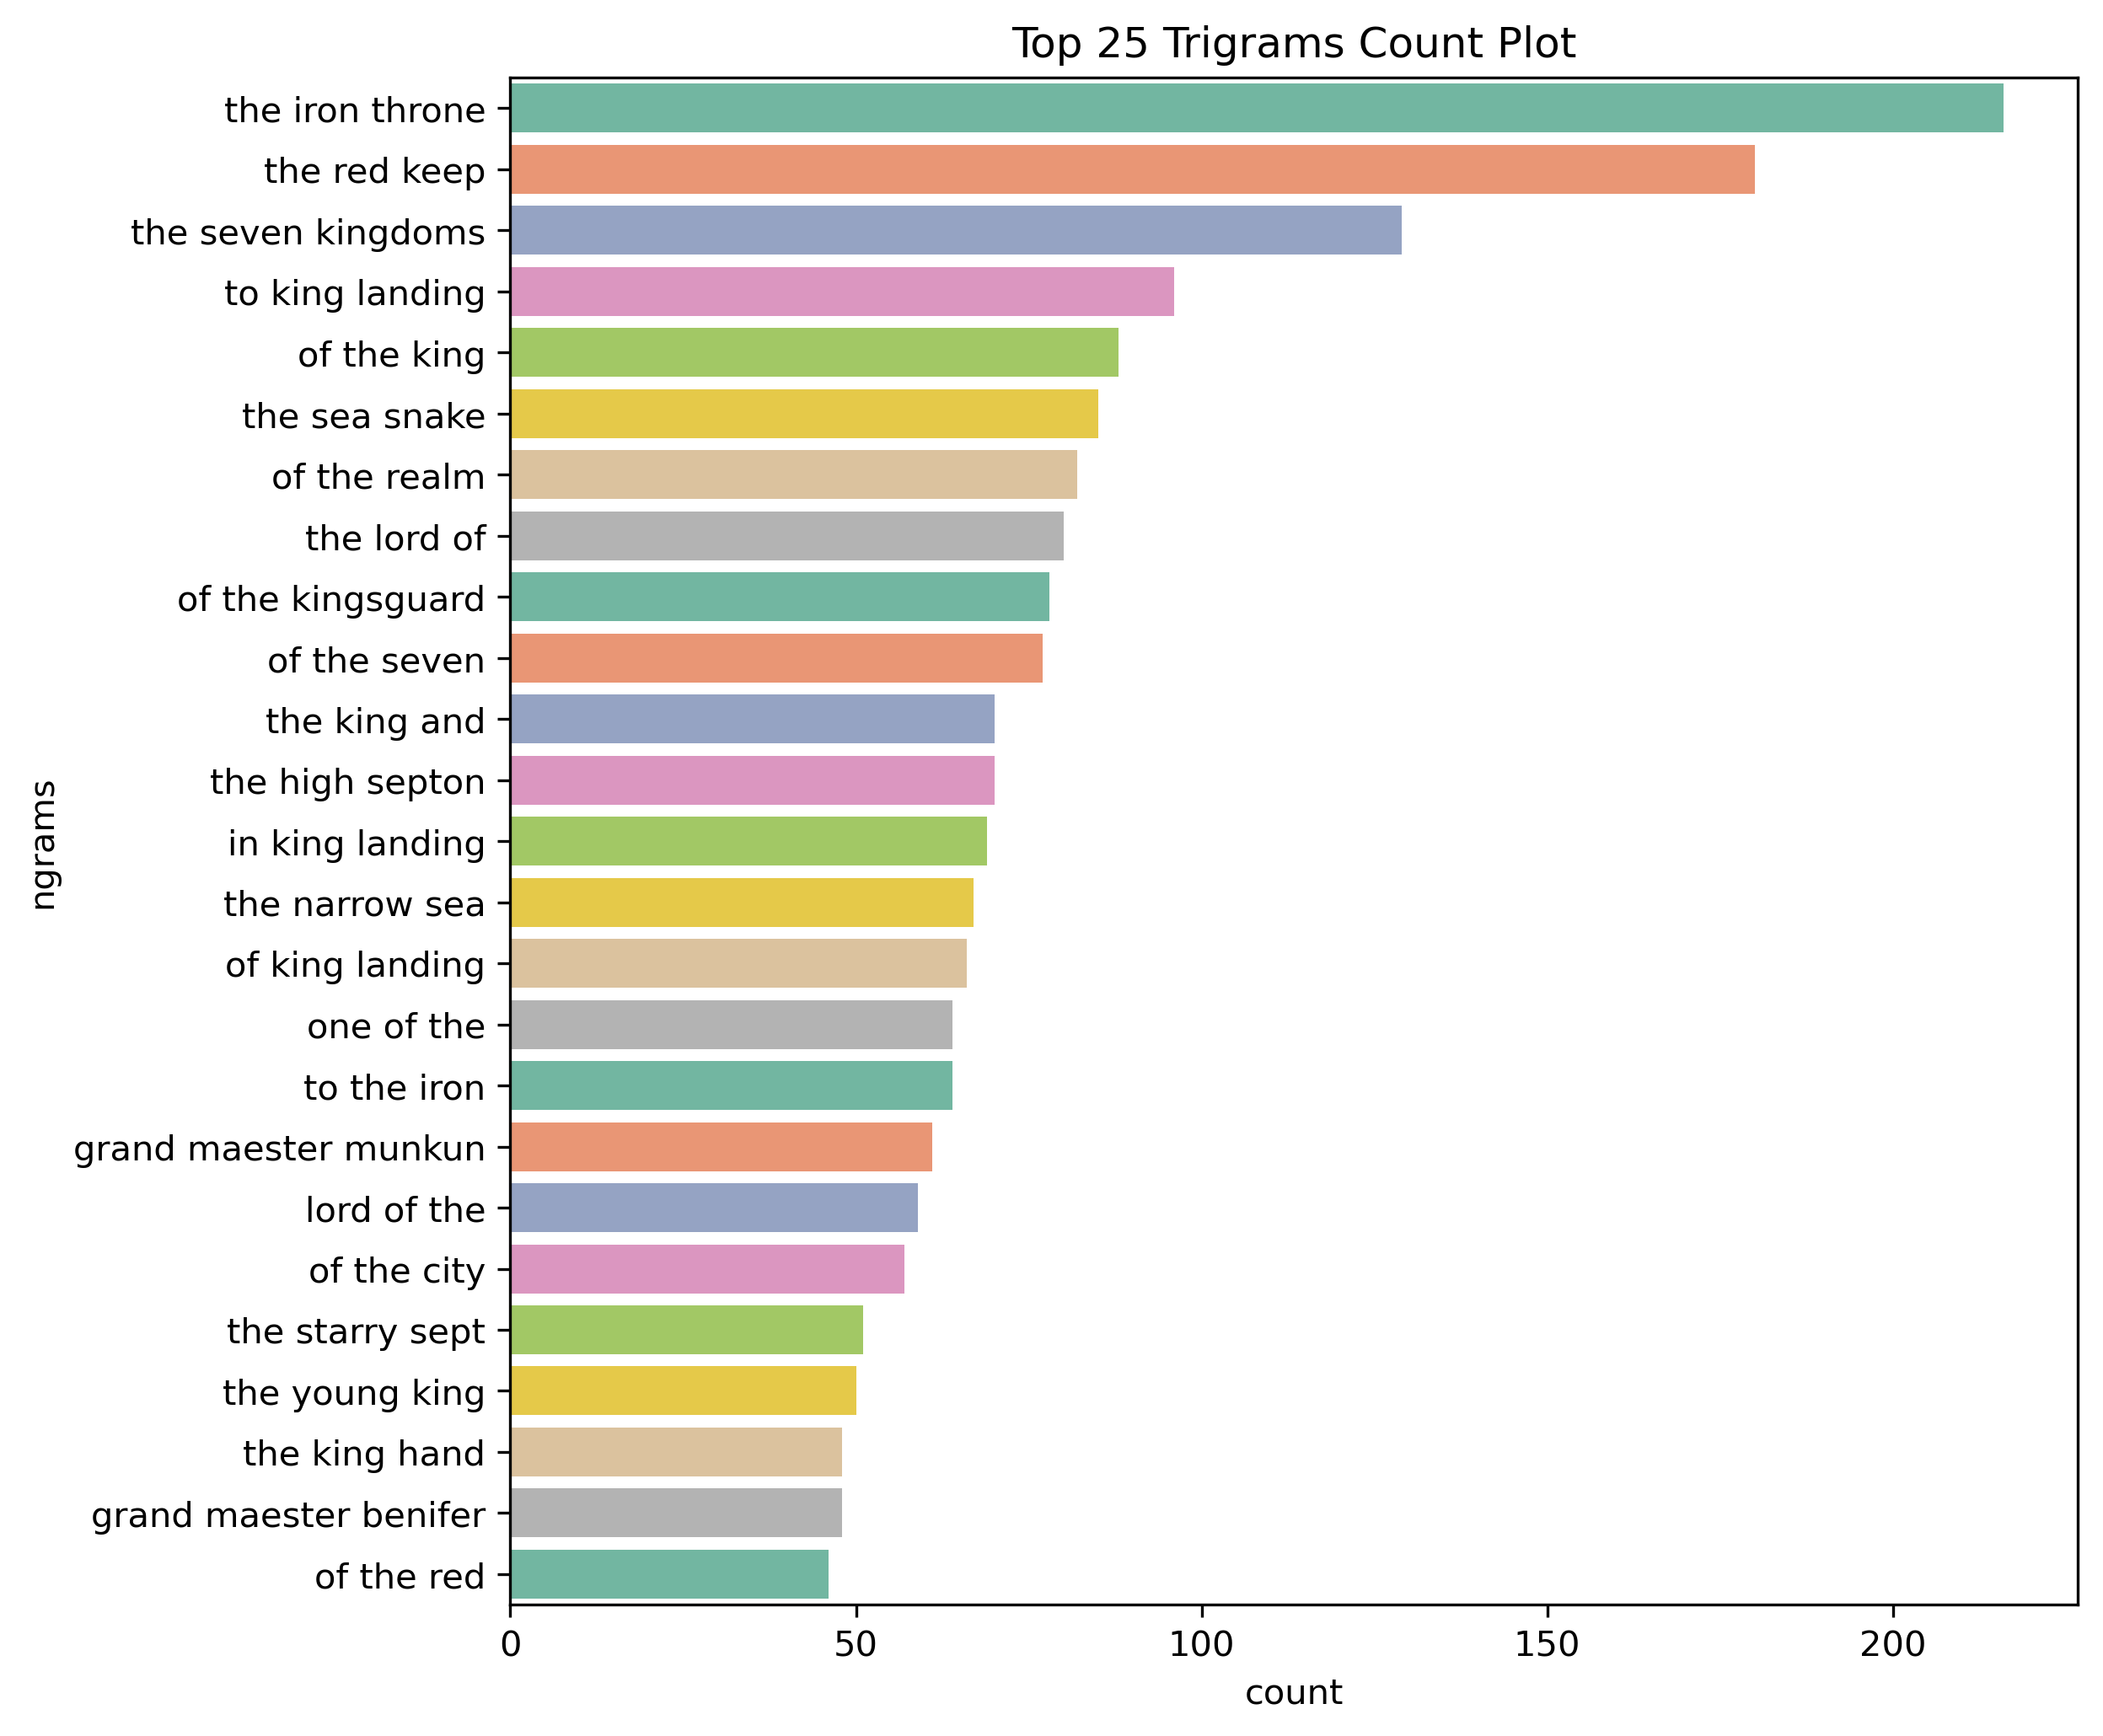

In [26]:
top_k = 25
top_k_trigrams = paragraph_analysis.get_top_k_ngrams(n=3, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_trigrams, title=f"Top {top_k} Trigrams Count Plot", figsize=(8, 8), dpi=300, save_flag=False)

#### LDA for Topic Extraction

In [27]:
vectorizer, lda_model, lda_vectors = paragraph_analysis.build_lda(n_components=20)

In [28]:
paragraph_analysis.extract_topics(vectorizer, lda_model)

› Topic 0:
    › ('the', 123.03478331066012)
    › ('of', 100.92503863474595)
    › ('for', 35.912102496376214)
    › ('her', 33.65322700093932)
    › ('in', 30.675868728339196)
    › ('had', 26.100296111301503)
    › ('to', 22.703728103532786)
    › ('coryanne', 20.033886327386952)
    › ('son', 15.544861473928597)
    › ('wylde', 14.451839894523783)
› Topic 1:
    › ('wants', 7.049999999773633)
    › ('high', 6.274889333236847)
    › ('or', 4.6221630916503225)
    › ('septon', 4.472141576512116)
    › ('sept', 4.331571768462328)
    › ('wiser', 2.9984677590822053)
    › ('expected', 2.810416385991857)
    › ('naked', 2.2585490939614763)
    › ('frighten', 2.050000008403785)
    › ('drawing', 2.050000004974412)
› Topic 2:
    › ('the', 1107.4893579535437)
    › ('to', 1106.4912105122398)
    › ('and', 939.1077257403175)
    › ('you', 580.6212461593248)
    › ('her', 438.1364725379278)
    › ('not', 427.1671855633837)
    › ('that', 390.55894349455303)
    › ('of', 389.100919277104)
  

### Analysis of Cleaned Paragraphs

In [29]:
out_dir = create_dir("../data", "analysis-data")
paragraph_analysis = ParagraphAnalysis(
    cleaned_paragraphs, 
    out_dir=out_dir
)
styled_print(f"Found {paragraph_analysis.words_counts} Words.", header=True)

› creating directory ... ../data/analysis-data
› Found 145723 Words.


#### Histogram of Paragraph Lengths

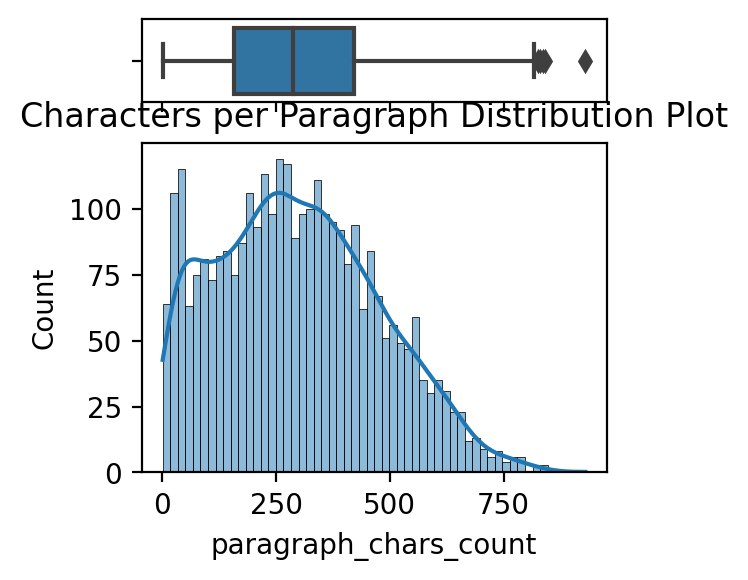

In [30]:
paragraph_analysis.characters_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Histogram of Words per Paragraph

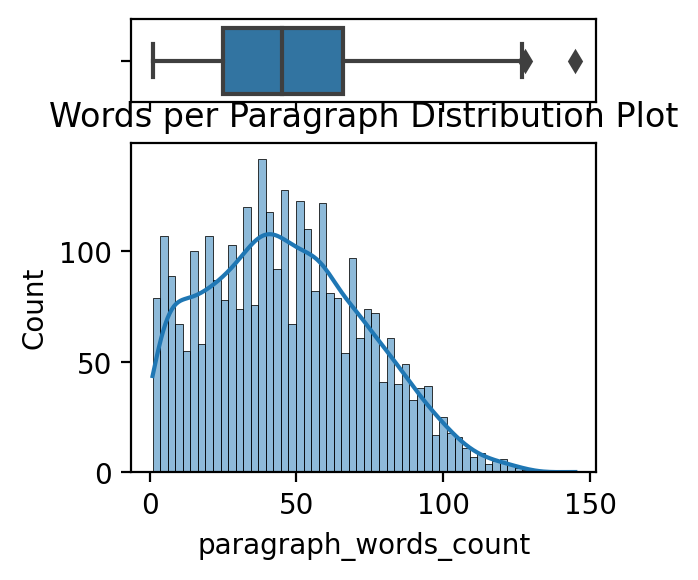

In [31]:
paragraph_analysis.words_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Histogram of Avg Word Lenghth per Paragraph

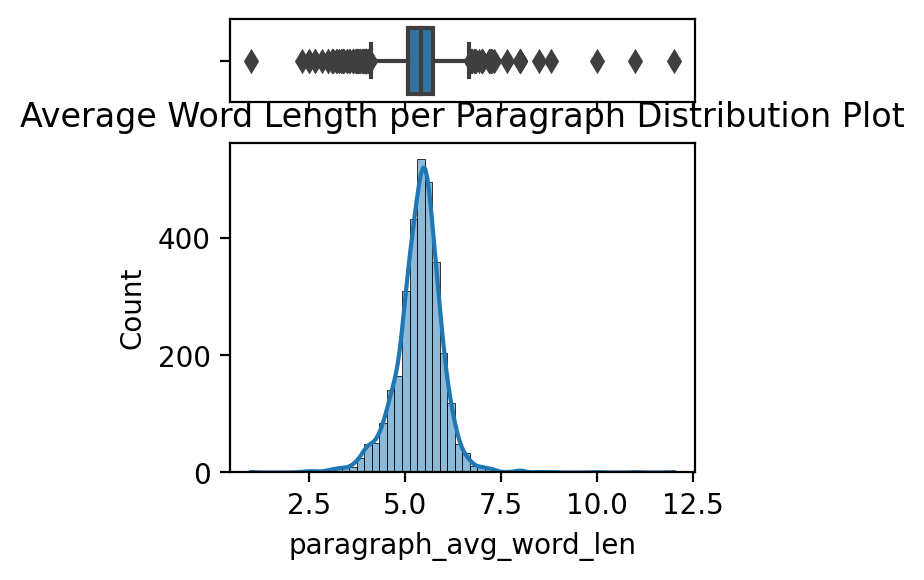

In [32]:
paragraph_analysis.avg_word_len_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Checking Stop Words

In [33]:
stop_words_corpus = paragraph_analysis.get_stop_words_corpus(language='english')
styled_print(f"Found {len(stop_words_corpus.keys())} unique stop words", header=True)

› Found 1 unique stop words


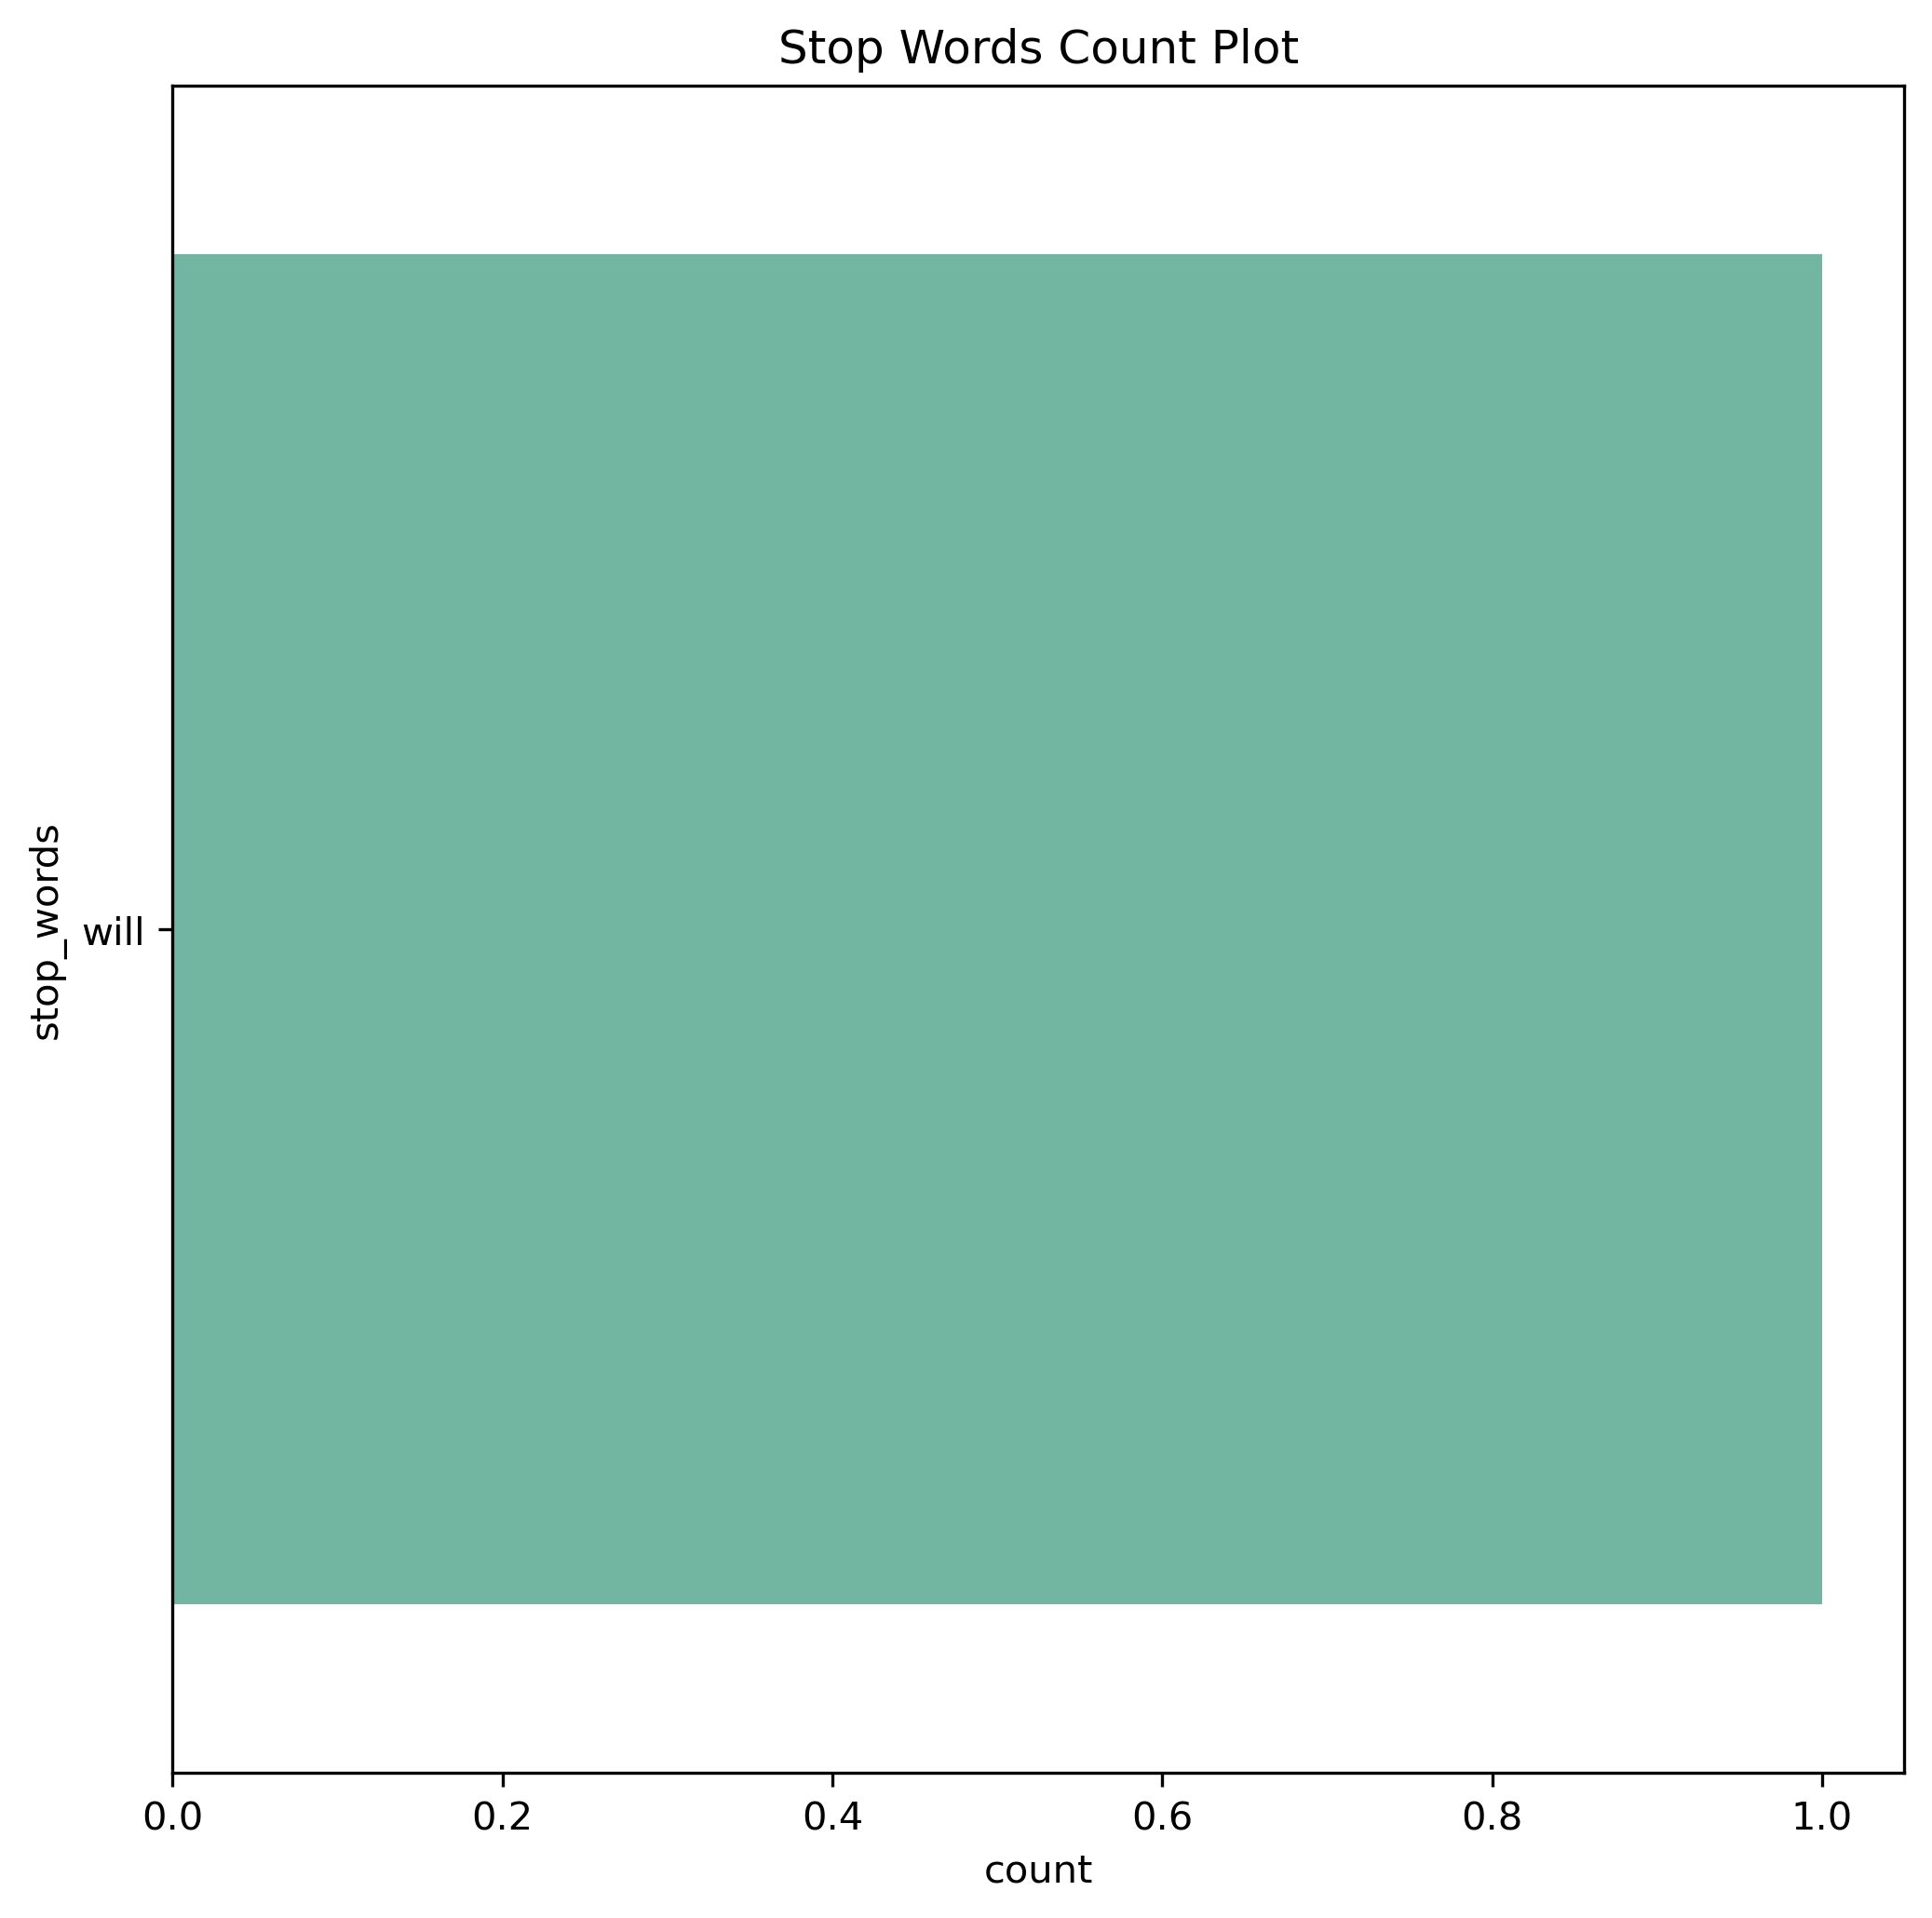

In [34]:
top_k = 25
top_k_stop_words = paragraph_analysis.get_top_k_stop_words(stop_words_corpus, top_k=top_k)
paragraph_analysis.plot_top_k_stop_words(
    top_k_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

#### Checking Non-Stop Words

In [35]:
non_stop_words_corpus = paragraph_analysis.get_non_stop_words_corpus(language='english')
styled_print(f"Found {len(non_stop_words_corpus.keys())} unique non-stop words", header=True)

› Found 10888 unique non-stop words


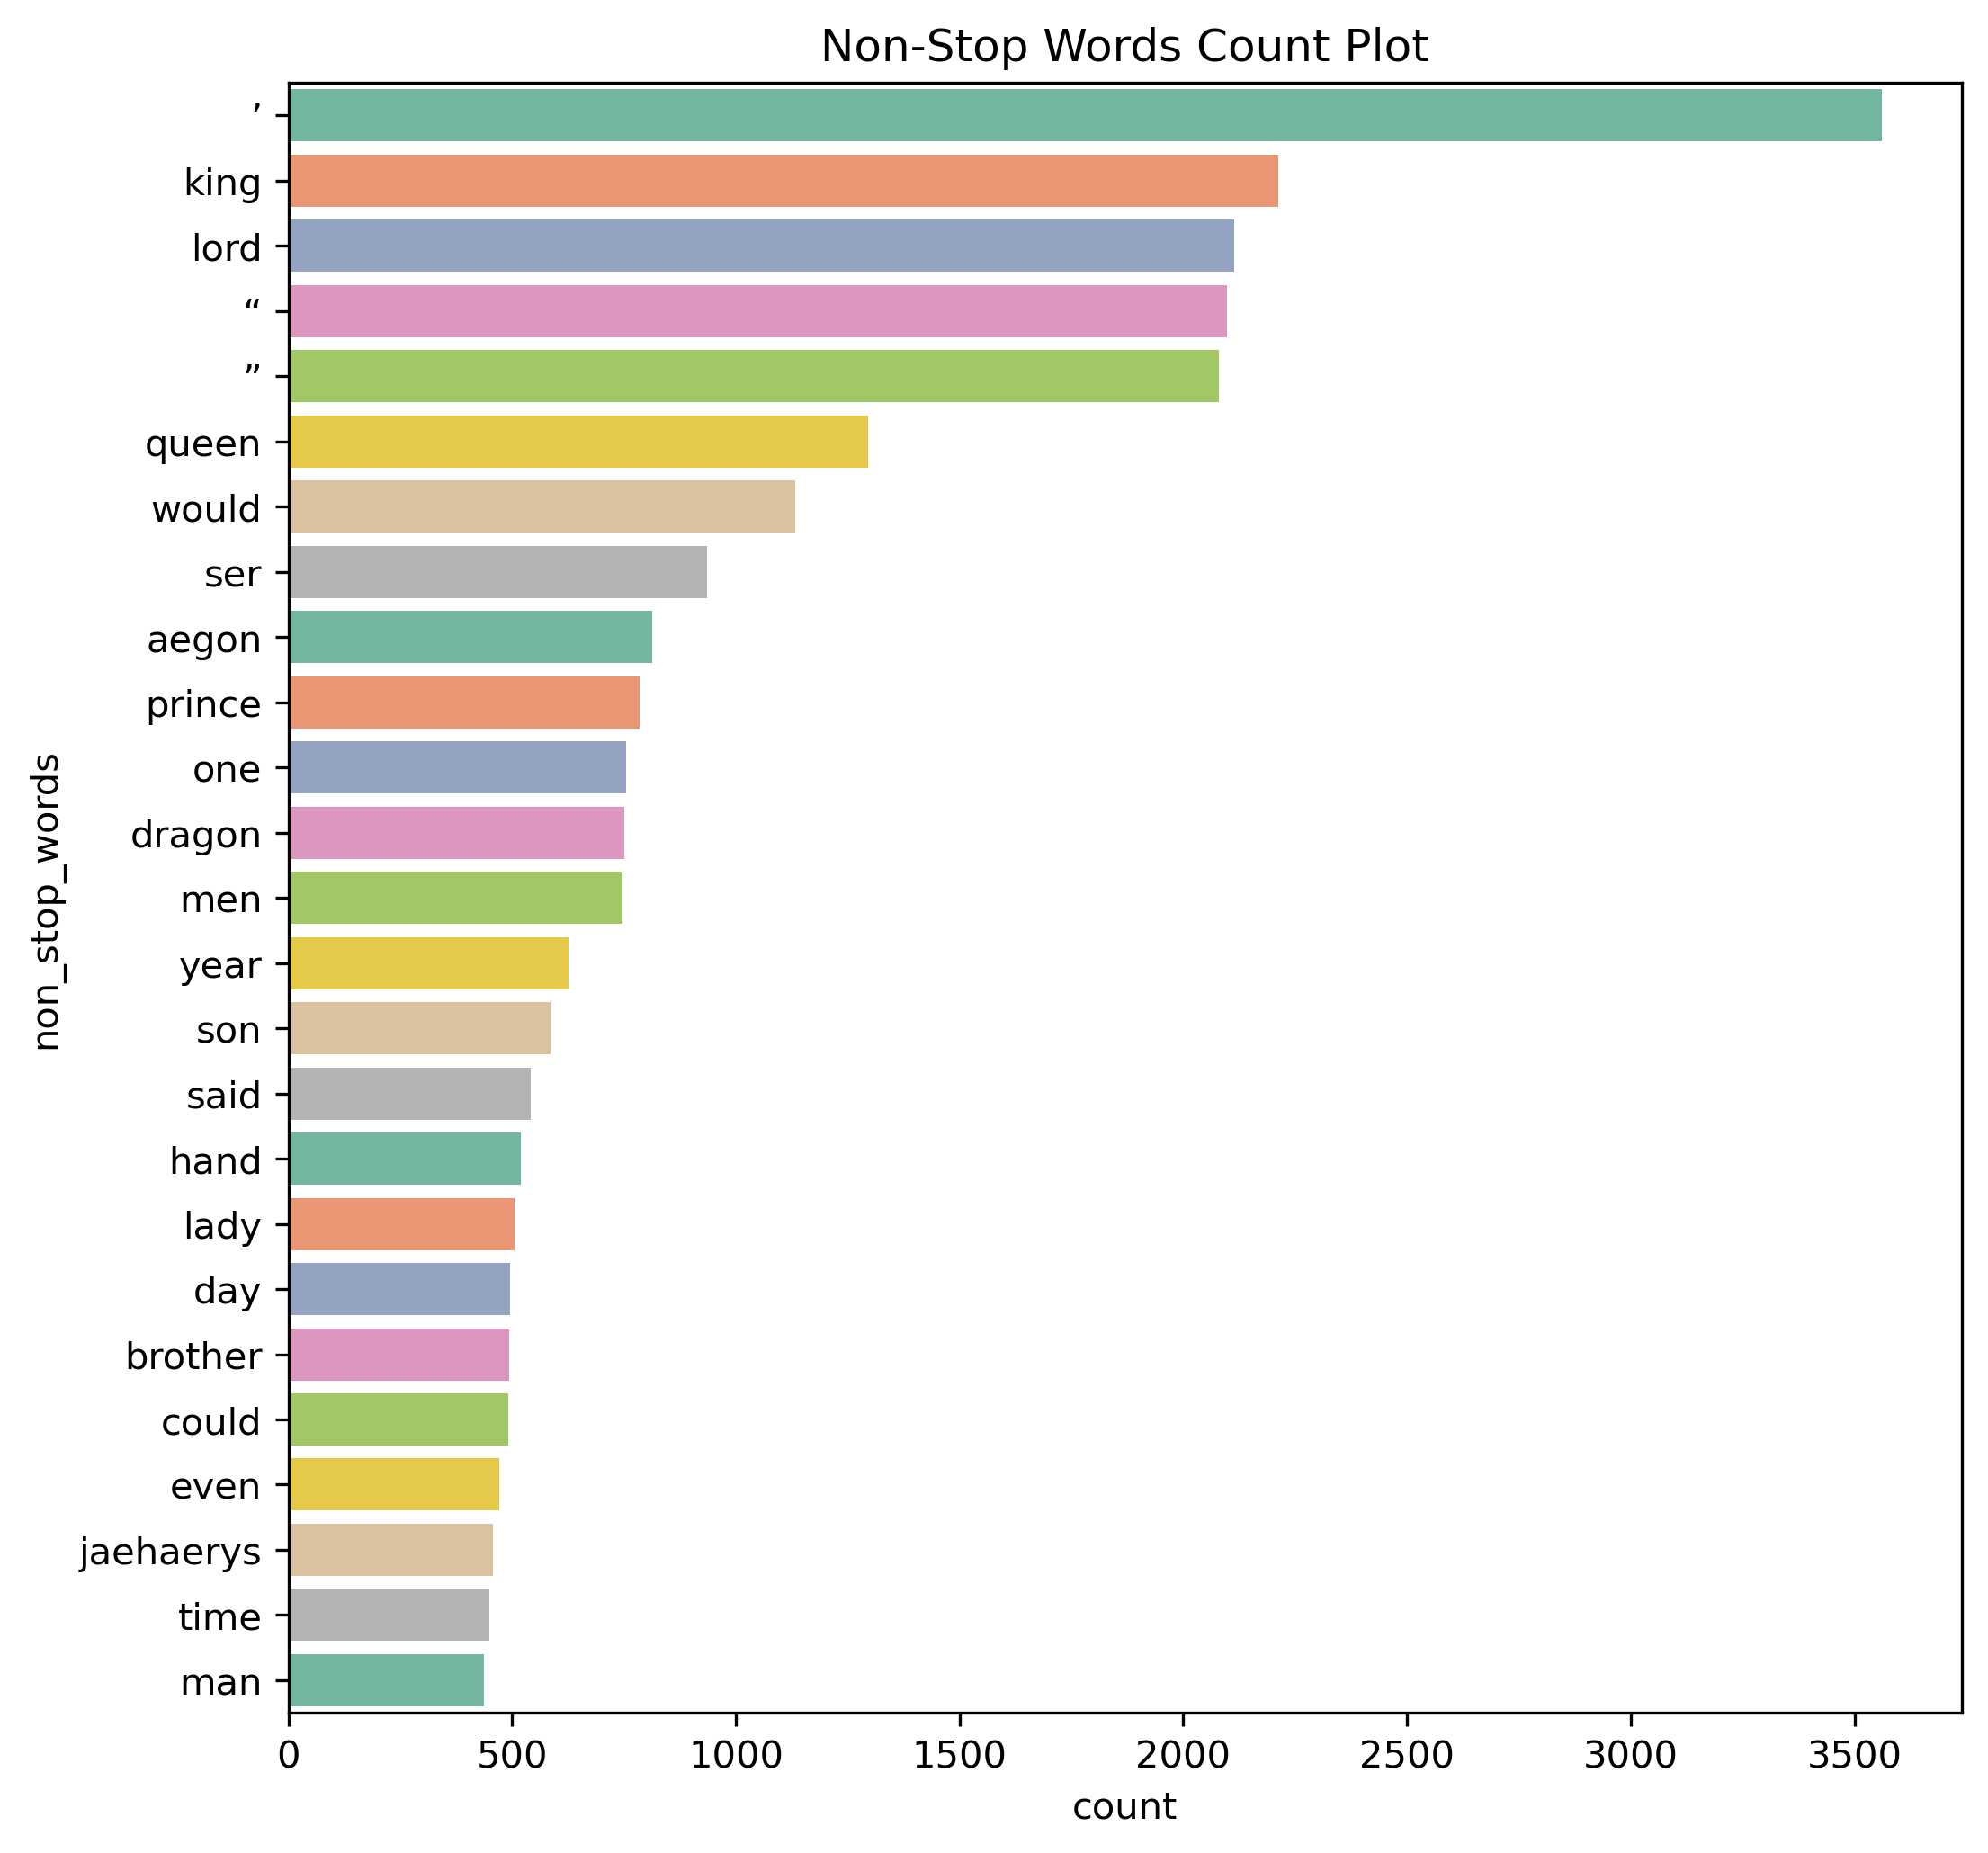

In [36]:
top_k = 25
top_k_non_stop_words = paragraph_analysis.get_top_k_non_stop_words(non_stop_words_corpus, top_k=top_k)
paragraph_analysis.plot_top_k_non_stop_words(
    top_k_non_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

#### Bi-Gram Analysis

In [37]:
bigrams = paragraph_analysis.get_ngrams(n=2, return_list=True)
styled_print(f"Found {len(bigrams)} Bigrams", header=True)

› Found 145722 Bigrams


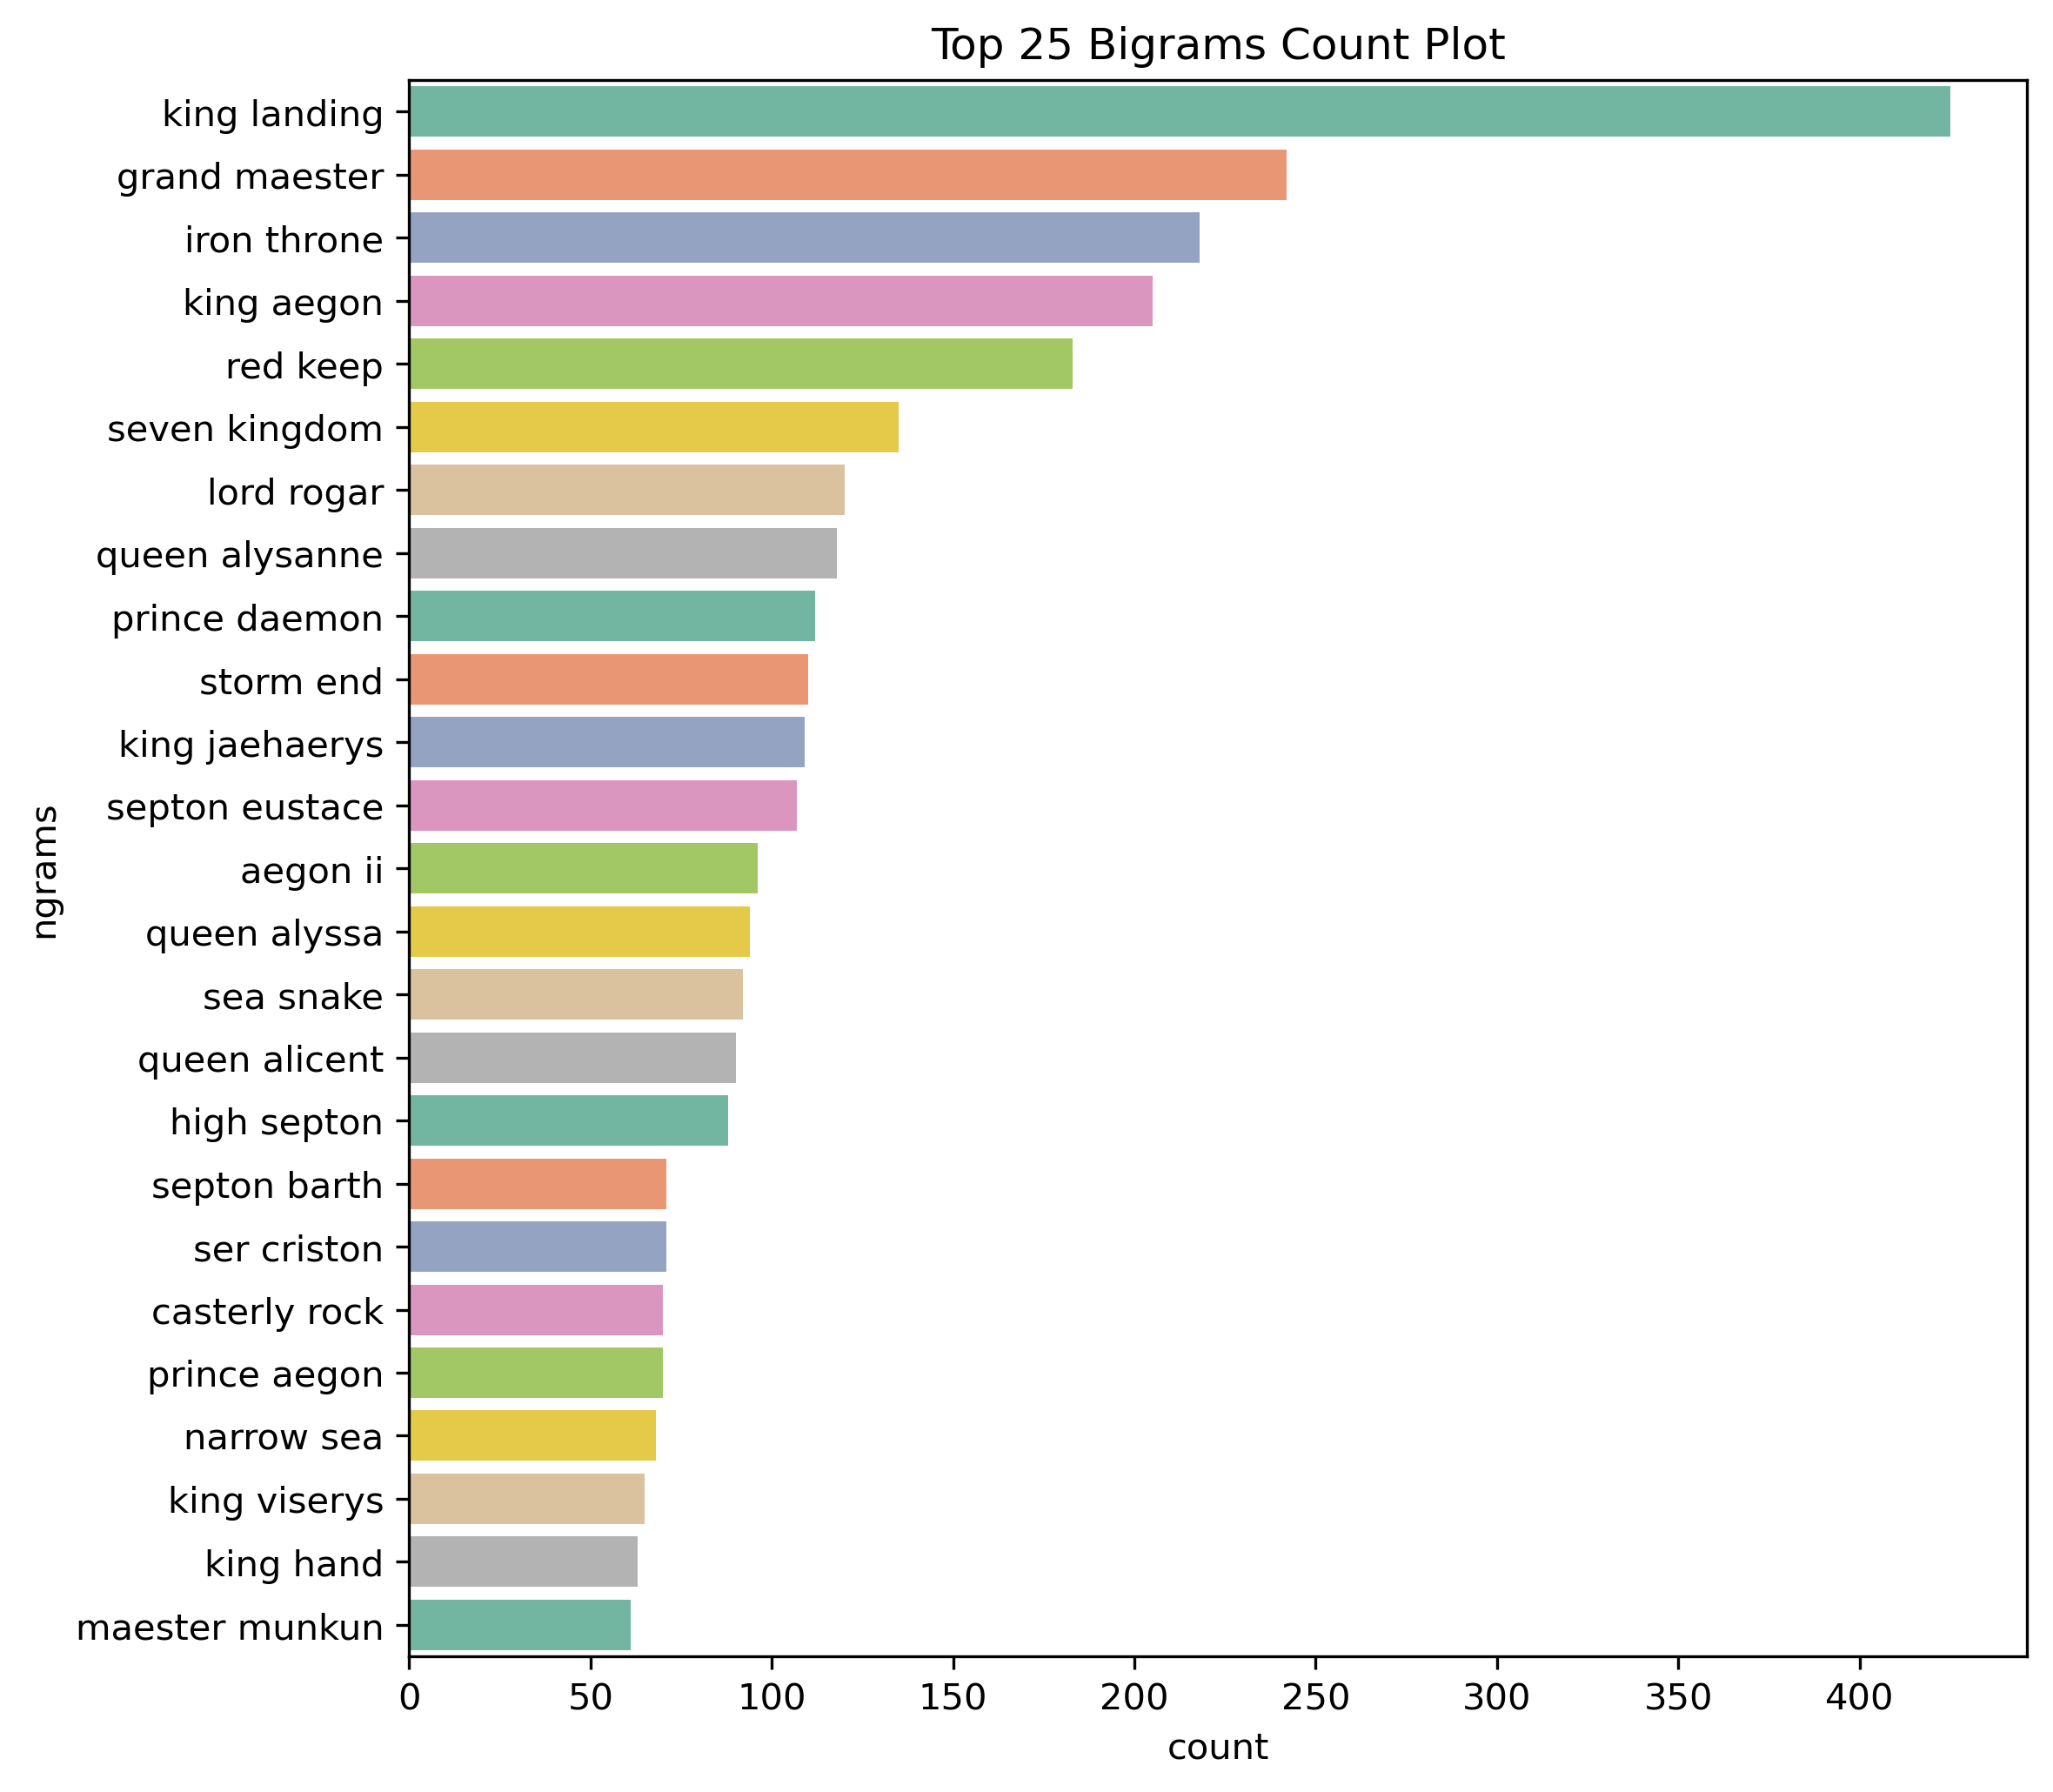

In [38]:
top_k = 25
top_k_bigrams = paragraph_analysis.get_top_k_ngrams(n=2, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_bigrams, title=f"Top {top_k} Bigrams Count Plot", figsize=(8, 8), dpi=300, save_flag=False)

#### Trigram Analysis

In [39]:
trigrams = paragraph_analysis.get_ngrams(n=3, return_list=True)
styled_print(f"Found {len(trigrams)} Trigrams", header=True)

› Found 145721 Trigrams


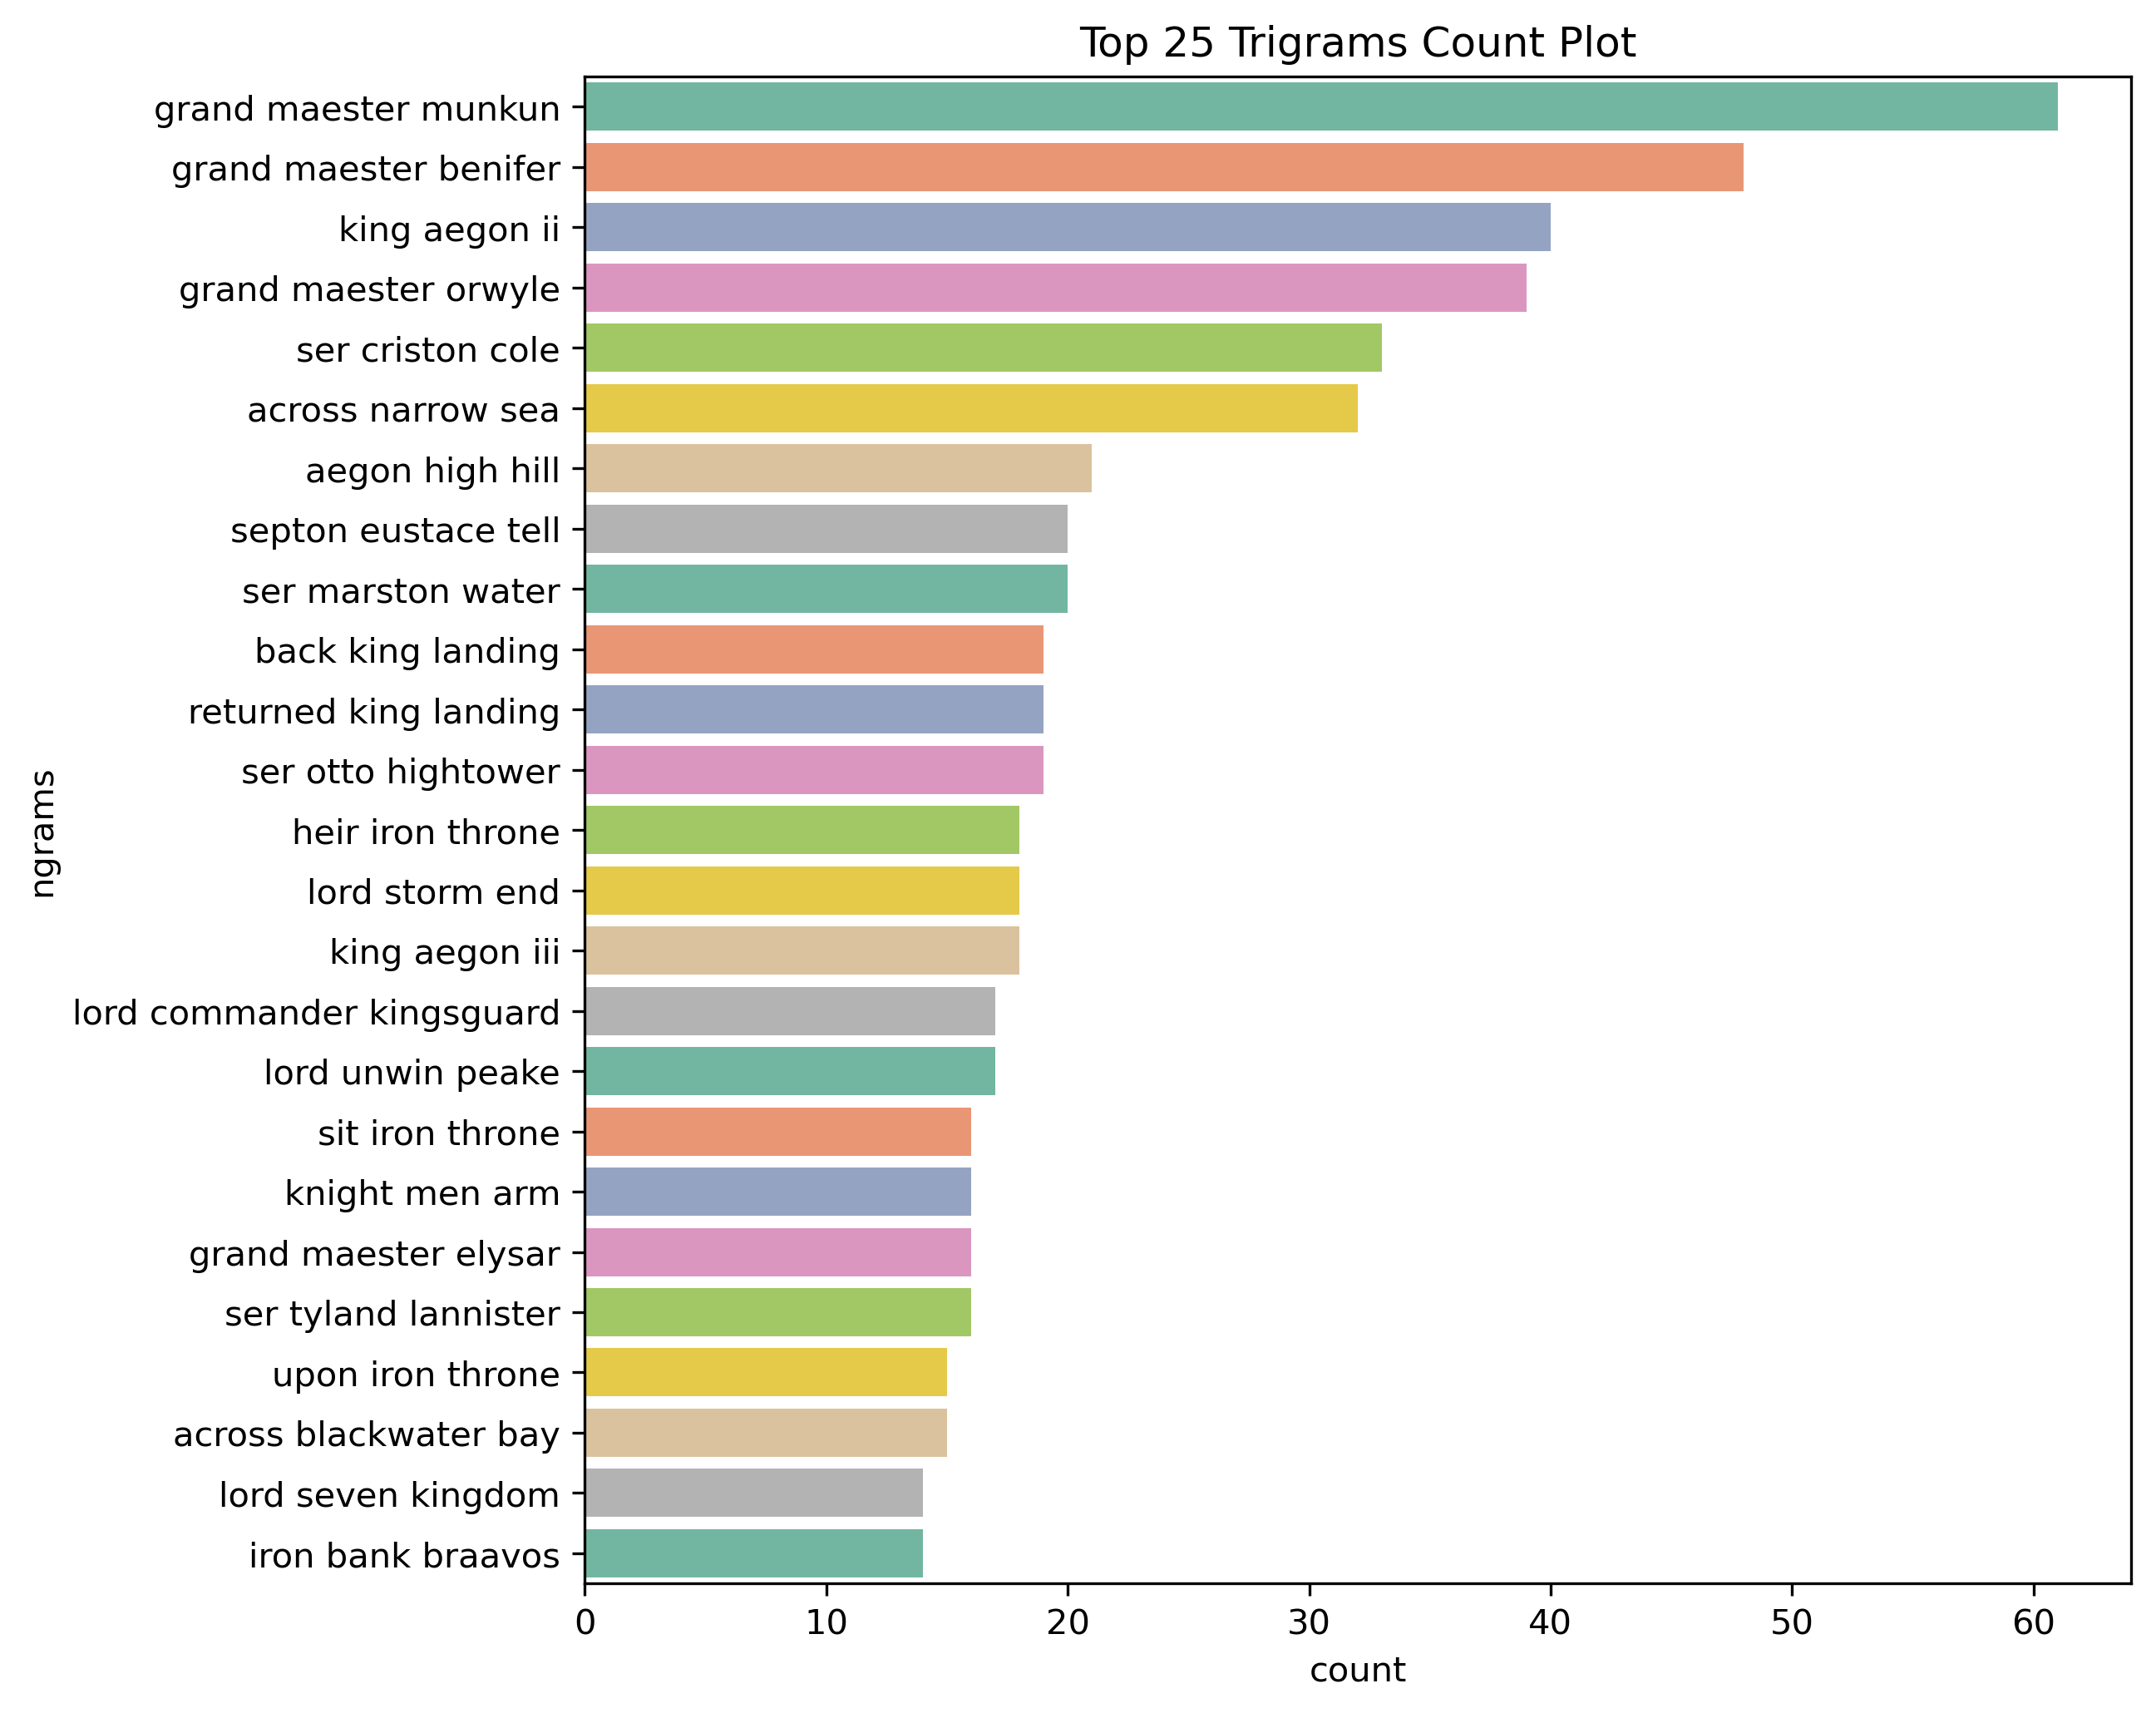

In [40]:
top_k = 25
top_k_trigrams = paragraph_analysis.get_top_k_ngrams(n=3, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_trigrams, title=f"Top {top_k} Trigrams Count Plot", figsize=(8, 8), dpi=300, save_flag=False)

#### LDA for Topic Extraction

In [41]:
vectorizer, lda_model, lda_vectors = paragraph_analysis.build_lda(n_components=20)

In [43]:
paragraph_analysis.extract_topics(vectorizer, lda_model, words_per_topics=30)

› Topic 0:
    › ('prince', 130.06928325765415)
    › ('dragon', 114.86439609175223)
    › ('would', 92.41244053938114)
    › ('king', 74.38861354121241)
    › ('lord', 57.75764106060309)
    › ('aegon', 47.18588295543334)
    › ('said', 41.722500204610164)
    › ('one', 36.55992594309656)
    › ('aemond', 36.117281370232384)
    › ('year', 35.062369475943555)
    › ('could', 34.96189232432582)
    › ('vhagar', 34.745574559850866)
    › ('daemon', 32.59854149340365)
    › ('dragonstone', 30.47952939108903)
    › ('queen', 28.255304633349034)
    › ('brother', 26.517573141069946)
    › ('never', 26.382559854458187)
    › ('back', 26.266771103327706)
    › ('targaryen', 25.664749500921715)
    › ('three', 25.63114721157771)
    › ('upon', 24.745236711210964)
    › ('sea', 24.42856439793011)
    › ('time', 23.74771550200054)
    › ('young', 23.637698314207164)
    › ('caraxes', 23.572329409654397)
    › ('old', 22.881583803819986)
    › ('son', 22.65310776662848)
    › ('took', 21.4813121